<a href="https://colab.research.google.com/github/PhD-Gabriel-Caballero/ESA-summer-school-2023-Croatia/blob/main/Fusing%20radar%20and%20optical%20time%20series%20data%20with%20Multi-output%20Gaussian%20process%20regression%20(MOGPR)%20using%20Google%20Earth%20Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fusing radar and optical time series data with Multi-output Gaussian process regression (MOGPR) using Google Earth Engine

---

This Jupyter notebook contains all the necessary information for Sentinel-1 and Sentinel-2 data fusing using MOGPR in the Google Earth (GEE) cloud computing platform. This material has been created exclusively for the 2023 European Space Agency (ESA) summer school.

---

Credits and references

[1]   Caballero, G.; Pezzola, A.; Winschel, C.; Sanchez Angonova, P.; Casella, A.; Orden, L.; Salinero-Delgado, M.; Reyes-Muñoz, P.; Berger, K.; Delegido, J.; et al. Synergy of Sentinel-1 and Sentinel-2 Time Series for Cloud-Free Vegetation Water Content Mapping with Multi-Output Gaussian Processes. Remote Sens. 2023, 15, 1822. https://doi.org/10.3390/rs15071822

[2]   Caballero, G.; Pezzola, A.; Winschel, C.; Casella, A.; Sanchez Angonova, P.; Orden, L.; Berger, K.; Verrelst, J.; Delegido, J. Quantifying Irrigated Winter Wheat LAI in Argentina Using Multiple Sentinel-1 Incidence Angles. Remote Sens. 2022, 14, 5867. https://doi.org/10.3390/rs14225867

[3]   Caballero G, Pezzola A, Winschel C, Casella A, Sanchez Angonova P, Rivera-Caicedo JP, Berger K, Verrelst J, Delegido J. Seasonal Mapping of Irrigated Winter Wheat Traits in Argentina with a Hybrid Retrieval Workflow Using Sentinel-2 Imagery. Remote Sensing. 2022; 14(18):4531. https://doi.org/10.3390/rs14184531







**Theoretical background**

Radar vegetation index (RVI) definition:

The Radar Vegetation Index (RVI) is an established metric of vegetation cover. It uses measured scattering intensities from co- and cross-polarization, normalized to ideally range from 0 to 1 with increasing vegetation cover (Kim et al., 2012).

For each Sentinel-1 scene, the dual-pol RVI can be initially generated as follows:

\begin{equation}
RVI=\frac{4VH}{VH+VV}
\end{equation}

Kim, Y.; Jackson, T.; Bindlish, R.; Lee, H.; Hong, S. Radar Vegetation Index for Estimating the Vegetation Water Content of Rice and Soybean. IEEE Geosci. Remote Sens. Lett. 2012, 9, 564–568

### Tracking Radar Vegetation Index (Agriculture Development) Script

[Link to script](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-1/sar_rvi_temporal_analysis/)

**General description of the script**

The script analyses and compares the RVI values using all available radar images. The script calculates the average RVI for the current and previous 2 months and takes the current image as the reference.

**Author of the script**
Valters Zeizis

**Evaluate and visualize**

[Sentinel Playground Temporal](https://apps.sentinel-hub.com/sentinel-playground-temporal/?source=S1-AWS-IW-VVVH&lat=46.548944380517646&lng=38.01544189453125&zoom=11&preset=CUSTOM&layers=VV,VH,HH&maxcc=20&gain=1.0&gamma=1.0&time=2017-01-01%7C2019-07-30&atmFilter=ATMCOR&showDates=false&evalscript=Ly9WRVJTSU9OPTMgKGF1dG8tY29udmVydGVkIGZyb20gMSkKZnVuY3Rpb24gc2V0dXAoKSB7CiAgcmV0dXJuIHsKICAgIGlucHV0OiBbewogICAgICBiYW5kczogWwogICAgICAgICAgICAgICAgICAiVlYiLAogICAgICAgICAgIlZIIgogICAgICBdCiAgICB9XSwKICAgIG91dHB1dDogeyBiYW5kczogMyB9LAogICAgbW9zYWlja2luZzogIk9SQklUIgogIH0KfQoKCmZ1bmN0aW9uIGNhbGNSVkkoc2FtcGxlKSB7CiAgdmFyIGRlbm9tID0gc2FtcGxlLlZIKjIrc2FtcGxlLlZWKjI7CiAgcmV0dXJuICgoZGVub20hPTApID8gKHNhbXBsZS5WSCo4KSAvIGRlbm9tIDogMC4wKTsKfQpmdW5jdGlvbiAgc3RyZXRjaCh2YWwsIG1pbiwgbWF4KSAgewogcmV0dXJuICh2YWwtbWluKS8obWF4LW1pbik7Cn0KCmZ1bmN0aW9uIGV2YWx1YXRlUGl4ZWwoc2FtcGxlcyxzY2VuZXMpIHsgIAogIHZhciBhdmcxID0gMC4yOwogIHZhciBjb3VudDEgPSAwOwogIHZhciBhdmcyID0gMC4yOwogIHZhciBjb3VudDIgPSAwOwogIHZhciBhdmczID0gMC4yOwogIHZhciBjb3VudDMgPSAwOwogIHZhciBlbmRNb250aCA9IHNjZW5lc1swXS5kYXRlLmdldE1vbnRoKCk7CiAgCiAgZm9yICh2YXIgaT0wO2k8c2FtcGxlcy5sZW5ndGg7aSsrKSB7CiAgICAgIHZhciBydmkgID0gY2FsY1JWSShzYW1wbGVzW2ldKTsKICAgICAgaWYgKHNjZW5lc1tpXS5kYXRlLmdldE1vbnRoKCk9PWVuZE1vbnRoKQogICAgICB7CgkJYXZnMyA9IGF2ZzMgKyBydmk7CiAgICAgICAgY291bnQzKys7CiAgICAgIH0KICAgICAgZWxzZSBpZiAoc2NlbmVzW2ldLmRhdGUuZ2V0TW9udGgoKT09KGVuZE1vbnRoLTEpKQogICAgICB7CgkJYXZnMiA9IGF2ZzIgKyBydmk7CiAgICAgICAgY291bnQyKys7CiAgICAgIH0KICAgICAgZWxzZQogICAgICB7ICAgICAgCgkJYXZnMT0gYXZnMSArIHJ2aTsKICAgICAgICBjb3VudDErKzsKICAgICAgfQogICAgICAKICB9CiAgYXZnMSA9IGF2ZzEvY291bnQxOwogIGF2ZzIgPSBhdmcyL2NvdW50MjsKICBhdmczID0gYXZnMy9jb3VudDM7CiAgYXZnMSA9IHN0cmV0Y2goYXZnMSwgMC4yNSwgMC43NSk7CiAgYXZnMiA9IHN0cmV0Y2goYXZnMiwgMC4yNSwgMC43NSk7CiAgYXZnMyA9IHN0cmV0Y2goYXZnMywgMC4yNSwgMC43NSk7CiAgCiAgcmV0dXJuIFthdmcxLGF2ZzIsYXZnM107CgoKfQpmdW5jdGlvbiBmaWx0ZXJTY2VuZXMgKHNjZW5lcywgaW5wdXRNZXRhZGF0YSkgewogICAgcmV0dXJuIHNjZW5lcy5maWx0ZXIoZnVuY3Rpb24gKHNjZW5lKSB7CgkgIHJldHVybiBzY2VuZS5kYXRlLmdldFRpbWUoKT49KGlucHV0TWV0YWRhdGEudG8uZ2V0VGltZSgpLTMqMzEqMjQqMzYwMCoxMDAwKSA7CiAgICB9KTsKfQoK&temporal=true)

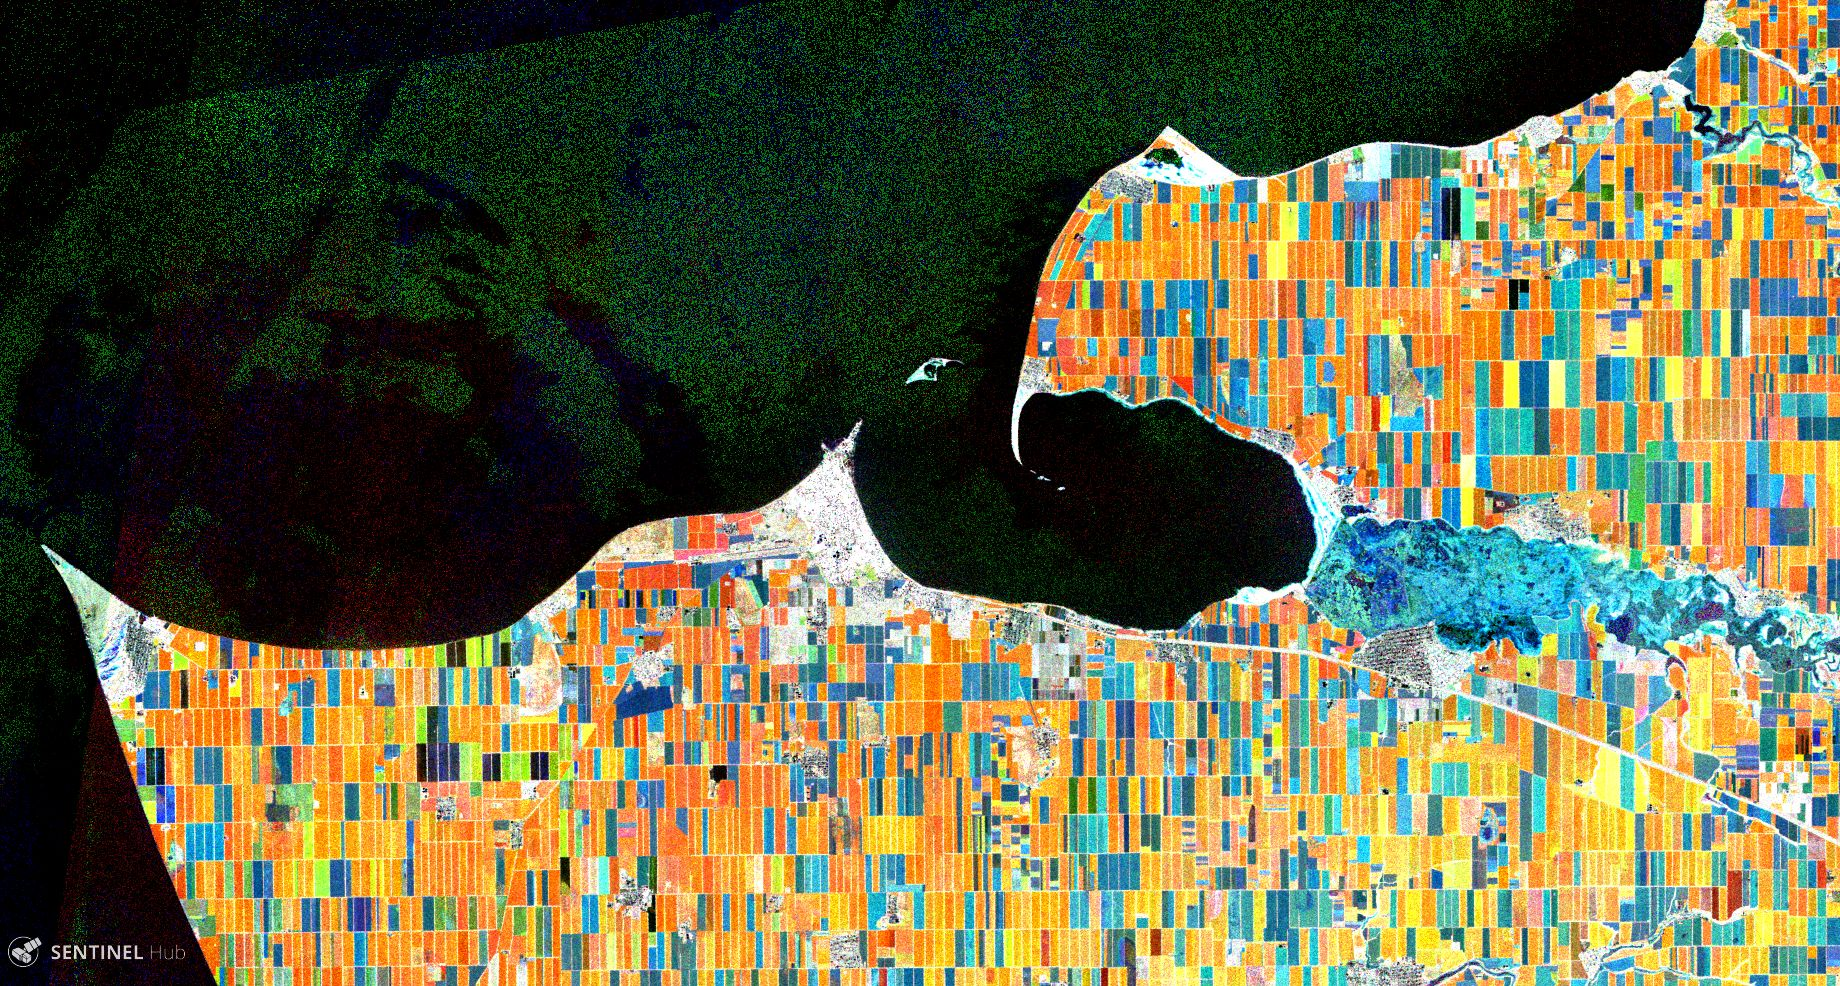

In the image you can see agriculture fields around Yeya river, Krasnodar region, Russia.

**Install all the necessary Python packages to run this application code**

In [ ]:
!pip install geemap
!pip install earthengine-api
!pip install --upgrade mogptk
!pip install PyCRS
!pip install vam.whittaker
!pip install cython
!pip install modape==1.0.3
!pip install pygal
!pip install ipygee
!pip install mss

**Import Python packages**

In [20]:
import ee
import geemap
import geemap.colormaps as cm

import pygal
import ipygee as ui
from ipygee import *
from ipygee import chart

import geemap.chart as chart

import mogptk
import  pycrs
from ipyleaflet import *
from ipywidgets import Label

from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

import matplotlib.dates as mdates
from scipy.io import loadmat, savemat
from scipy.interpolate import Akima1DInterpolator
from scipy import signal
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.ticker as ticker

import vam.whittaker
from vam.whittaker import  ws2d, ws2dp, ws2doptv, lag1corr
import pandas as pd

import math
from shapely.geometry import box
import time

import scipy.io
import os
import pickle

import array
import modape
from modape.whittaker import ws2d, ws2doptv, ws2doptvp
from modape.utils import DateHelper, fromjulian

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Clone the GitHub repository**

In [5]:
!rm -r ESA-summer-school-2023-Croatia # delete the complete repository folder
!git clone https://github.com/PhD-Gabriel-Caballero/ESA-summer-school-2023-Croatia # clone repository folder
sys.path.insert(0,'/content/ESA-summer-school-2023-Croatia')

Cloning into 'ESA-summer-school-2023-Croatia'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 233 (delta 137), reused 116 (delta 80), pack-reused 53
Receiving objects: 100% (233/233), 13.06 MiB | 6.62 MiB/s, done.
Resolving deltas: 100% (148/148), done.


**To use the Earth Engine API on the GEE cloud platform, import ee and geemap, and then log in to authenticate**

In [6]:
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

**Define and visualize the study area**

In [7]:
# Set map display properties.
Map = geemap.Map(toolbar_ctrl=True, layer_ctrl=True)
Map.default_style = {'cursor': 'crosshair'}
Map.add_basemap('SATELLITE')

# Center the map in the desired country
country = 'Argentina'
country_bounds = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filterMetadata('country_na', 'equals', country);
Map.centerObject(country_bounds,6)
Map

Map(center=[-34.687845828472675, -64.74963675588427], controls=(WidgetControl(options=['position', 'transparen…

**Show the Region Of Interest (ROI) in the interactive map**

In [8]:
# Please provide here the information on the experimental station and the boundaries of your crop essay.
wheat_roi = geemap.shp_to_ee('/content/ESA-summer-school-2023-Croatia/Vectors/Wheat trial sketch 2020/wheat trial sketch 2020.shp')
EEHA_roi = geemap.shp_to_ee('/content/ESA-summer-school-2023-Croatia/Vectors/EEHA boundaries/INTA EEHA subdivision 2020.shp')
wheat_insitu_points =  geemap.shp_to_ee('/content/ESA-summer-school-2023-Croatia/Vectors/Wheat sampling points 2020/wheat_sampling_points_2020.shp')
wheat_insitu_points_insitu_data_2020 = geemap.shp_to_ee('/content/ESA-summer-school-2023-Croatia/Vectors/Wheat sampling points 2020/wheat_sampling_points_insitu_data_2020.shp')

Map.addLayer(wheat_roi, {},'Wheat roi 2020',True, opacity = 0.3)
Map.addLayer(wheat_insitu_points, {},'Wheat insitu points 2020',True)
Map.addLayer(EEHA_roi, {},'Study area',True, opacity = 0.5)

**Retrieve the ROI from the map**

In [10]:
feature = Map.draw_last_feature
analized_roi = feature.geometry(proj="EPSG:4326")

### **Part-1: Sentinel-2 MSI data processing**

**Functions definition**

In [11]:
# Function to calculate and add a parametric index band (EVI)

# Original definition of EVI index:
#EVI = 2.5 * ((NIR - RED) / (NIR + 6 * RED - 7.5 * BLUE + 1))

# Sentinel-1 bands:
#NIR = B8 (842nm)
#RED = B4 (665 nm)
#BLUE = B2 (490 nm)

# ARTMO-based EVI formulation for S2 spectral configuration:
# EVI [2.5.*((B2*-B3*)./(B2*+(6.*B3*)-7.5.*(B1*)+1))]

# Bands:
# B1*=560 nm
# B2*=740 nm
# B3*=783 nm

# (*) indicates the ordinal number of the spectral bands used in ARTMO.

def addEVI(image):
    # Compute the EVI parametric index.
    EVI = image.expression(
        '2.5 * ((band2 - band3) / (band2 + 6 * band3 - 7.5 * band1 + 1))', {
            'band1': image.select('B3'),
            'band2': image.select('B6'),
            'band3': image.select('B7')
        }).rename("EVI")

    image = image.addBands(EVI)

    return(image)

LAI linear regression in ARTMO based on EVI spectral index and wheat in situ data

NRME = 13.7537 %; R2=0.8525

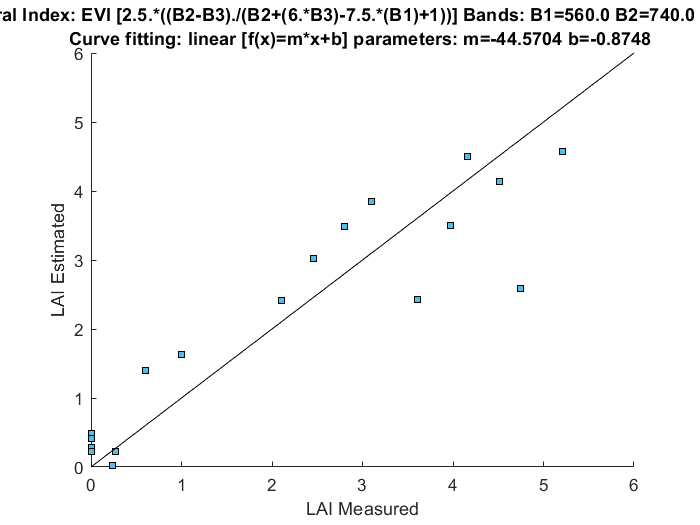

In [12]:
# Function to calculate and add a parametric index band (LAI)

# The curve fitting was obtained through ARTMO: linear [f(x)=m*x+b] parameters: m=33.5111 b=-0.8891
# LAI = -44.5704*EVI - 0.8748

def addLAI(image):
    LAI = image.expression(
        '(-44.5704*EVI - 0.8748)', {
            'EVI': image.select('EVI')
        }).rename("LAI")
    image = image.addBands(LAI)

    return(image)

In [13]:
# Clipping image collection by geometry
def clipcol(image):
    clipimage = image.clip(EEHA_roi)
    return clipimage

In [14]:
# Masking function for water and cloud filtering

def maskS2cloud_and_water(image):
  not_water = image.select('SCL').neq(6);
  not_cloud_low = image.select('SCL').neq(7);
  not_cloud_medium = image.select('SCL').neq(8);
  not_cloud_high = image.select('SCL').neq(9);
  not_cirrus = image.select('SCL').neq(10);

  # Bits 10 and 11 are clouds and cirrus, respectively.
  qa = image.select('QA60');
  cloudBitMask = 1 << 10;
  cirrusBitMask = 1 << 11;

  # Both flags should be set to zero, indicating clear conditions.
  mask = (qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0)).And(not_water).And(not_cloud_low)
          .And(not_cloud_medium).And(not_cloud_high).And(not_cirrus))
  return image.updateMask(mask).divide(10000).copyProperties(qa).set('system:time_start', qa.get('system:time_start'))



---

Bitmask for QA60

Bits 0-9: Unused

Bit 10: Opaque clouds
  0: No opaque clouds
  1: Opaque clouds present
  
Bit 11: Cirrus clouds
  0: No cirrus clouds
  1: Cirrus clouds present

---

SLC Scene Classification Map band
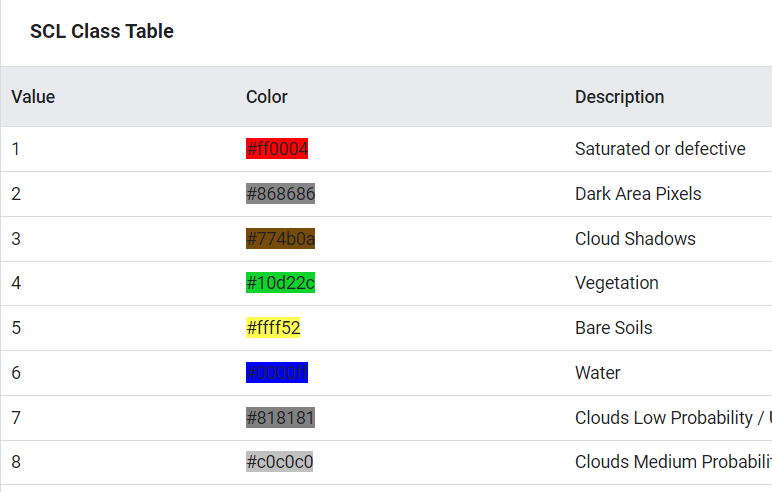
---

To get a complete understanding of the Q60 cloud mask and the SCL Scene Classification Map bands, kindly refer to the link provided below:

[Q60 Cloud mask](https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR#bands)

---

If you're looking for a more intricate method for obtaining cloud and shadow-free images in GEE, check out the tutorial available through the following link:

[Sentinel-2 Cloud Masking with s2cloudless](https://developers.google.com/earth-engine/tutorials/community/sentinel-2-s2cloudless)

This tutorial is an introduction to masking clouds and cloud shadows in Sentinel-2 (S2) surface reflectance (SR) data using Earth Engine. Clouds are identified from the S2 cloud probability dataset (s2cloudless) and shadows are defined by cloud projection intersection with low-reflectance near-infrared (NIR) pixels.

---


**Dates of interest and acquisitions configuration parameters**

In [15]:
# Configuration Parameters
start_date = '2018-12-01'
end_date = '2021-01-11'
S2_CPP = 5 # CLOUDY_PIXEL_PERCENTAGE
roi = analized_roi # Select the current region of interest

**Create the initial image collection with the spectral bands**

In [ ]:
# Retrieving Sentinel 2 imagery
print('SENTINEL-2 time series being retrieved')
S2collection_raw = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
                   .filterBounds(roi)\
                   .filterDate(start_date,end_date)\
                   .filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than', S2_CPP)\
                   .map(maskS2cloud_and_water)\
                   .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8','B8A','B11','B12'])\

# Apply water masking functions to the image collection
S2collection_ini = S2collection_raw.map(addEVI).map(clipcol).select(['B2', 'B3', 'B4','EVI']);

**Sentinel 2 date label extraction**

In [23]:
# Creating labels - Multitemporal plotting
labels_S2 = S2collection_ini.aggregate_array("system:index").getInfo()

# Dates S2
Dates_S2 = []
for i in labels_S2:
    Dates_S2.append(datetime.strptime(i.split('_')[0].split('T')[0], '%Y%m%d').date())
Dates_S2.sort()

#datetime.datetime.strptime(date, "%Y-%m-%d")
#https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

**Generate a collection of retrieved images by using parametric indices**

In [24]:
# Add the LAI band to the image collection
S2_PI_LAI_collection = S2collection_ini.map(addLAI).select('LAI')

**S2 image collection to a numpy array conversion**

In [ ]:
S2_PI_LAI_image = S2_PI_LAI_collection.toBands().unmask(0);
S2_PI_LAI_image_nparray = geemap.ee_to_numpy(ee_object = S2_PI_LAI_image.toArray(), region=analized_roi, default_value=None)

print('S2 ROI Dimension')
print(S2_PI_LAI_image_nparray.shape)

**LAI mean calculation at ROI level**

In [26]:
S2_PI_LAI_parcel_mean = S2_PI_LAI_image_nparray.mean(axis=1).mean(axis=0)
S2_PI_LAI_parcel_std = np.std(S2_PI_LAI_parcel_mean, axis=0)

**Plot S2-based LAI time series for the selected ROI**

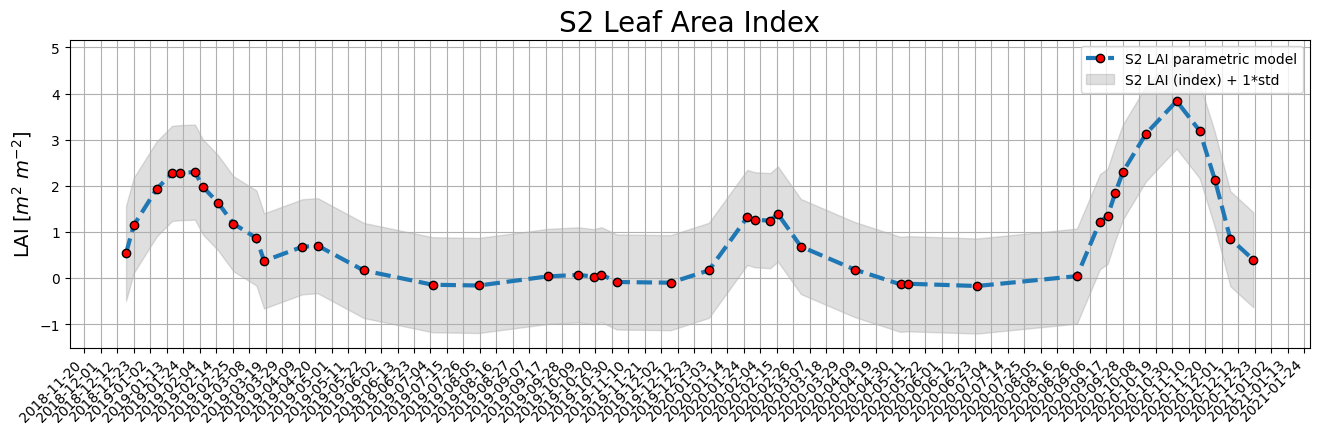

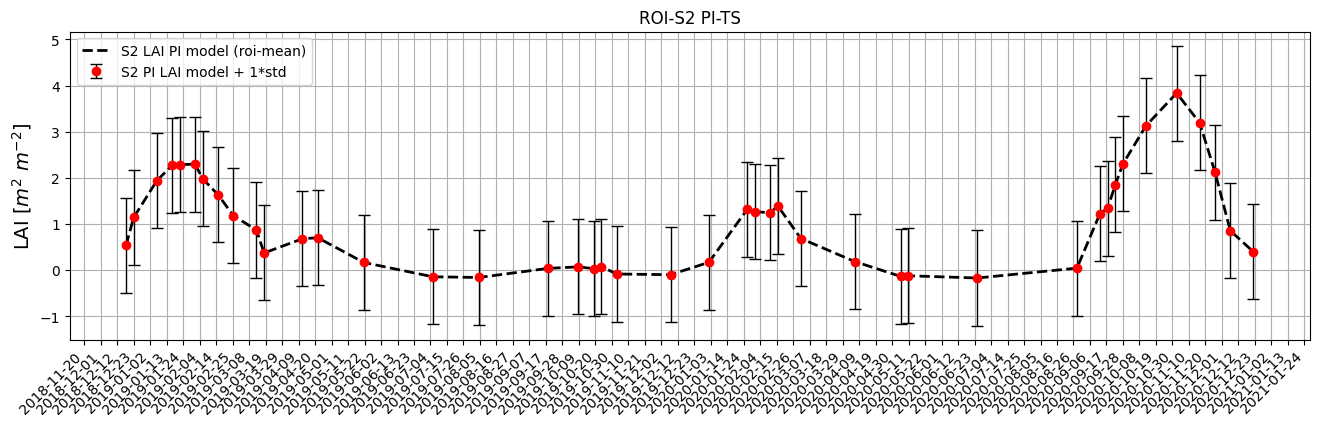

Temporal Series Length 43


In [27]:
# Sentinel 2 LAI parametric index model time series plotting

axmaxloc = S2_PI_LAI_image_nparray.shape[2]/4;
axminloc = S2_PI_LAI_image_nparray.shape[2]/4;

#-------------------------------
# S2 LAI graph 1 (Shadowed standard deviation)

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_PI_LAI_parcel_mean,linestyle="--",marker="o",markerfacecolor='red',markeredgecolor='k',markersize=6,lw=3,label='S2 LAI parametric model')
plt.fill_between(Dates_S2, S2_PI_LAI_parcel_mean-S2_PI_LAI_parcel_std,S2_PI_LAI_parcel_mean+S2_PI_LAI_parcel_std ,alpha=0.25,color='grey',label='S2 LAI (index) + 1*std')
plt.title('S2 Leaf Area Index',fontsize='20')
plt.legend()
plt.grid(1)
plt.ylabel('LAI [$m^2$ $m^{-2}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

#-------------------------------
#S2 LAI graph 2 (Error bars.)

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(Dates_S2,S2_PI_LAI_parcel_mean,'--k', lw=2)
plt.errorbar(Dates_S2,S2_PI_LAI_parcel_mean, fmt='ro', label="data",yerr=S2_PI_LAI_parcel_std, ecolor='black', lw=1,capsize=4)
plt.title('ROI-S2 PI-TS')
plt.legend(['S2 LAI PI model (roi-mean)','S2 PI LAI model + 1*std'])
plt.grid(1)
plt.ylabel('LAI [$m^2$ $m^{-2}$]',fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.show()

#-------------------------------
print('Temporal Series Length', S2_PI_LAI_parcel_mean.shape[0])

### **Part-2: Sentinel-1 SAR data processing**

**Sentinel 1 imagery retrieval and RVI time series calculations**

In [28]:
# Function to calculate and add an RVI band
# RVI = (4*VH)/(VV+VH)

def addRVI(image):
    rvi = (image.select('VH').divide(image.select('VH').add(image.select('VV'))).multiply(4)).rename('RVI');
    return image.addBands(rvi)

In [29]:
#Function to convert from dB
def toNatural(img):
    return ee.Image(10.0).pow(img.select(0).divide(10.0))

#Function to convert to dB
def toDB(img):
    return ee.Image(img).log10().multiply(10.0)

**Create the initial image collection with the polarization bands**

In [30]:
# Retrieving Sentinel 1 imagery
print('SENTINEL1 time series being retrieved')
S1collection = ee.ImageCollection('COPERNICUS/S1_GRD_FLOAT')\
                     .filterBounds(roi)\
                     .filterDate(start_date, end_date)\
                     .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))\
                     .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))\
                     .filter(ee.Filter.eq('instrumentMode', 'IW'))\
                     .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
                     .filter(ee.Filter.eq('resolution','H'))\
                     .select('VH','VV')\

# Sort the dataset S1
S1collection = S1collection.sort('GRD_Post_Processing_start');

SENTINEL1 time series being retrieved


In [31]:
# Speckle filtering
S1collection_VH  = ee.ImageCollection(S1collection.select(["VH"]))
S1collection_VV  = ee.ImageCollection(S1collection.select(["VV"]))

image_S1_VH = S1collection_VH.toBands();
image_S1_VV = S1collection_VV.toBands();

**Generate histogram with default number of bins**
[Chart histogram geemap](https://geemap.org/notebooks/79_chart_histogram/)

In [32]:
image_number = 26 # select the ordinal number of the image you want to be displayed

# Set the data and plot options

source = image_S1_VH.select(image_number)
my_sample = source.sample(roi, 10)

property = source.bandNames().getInfo()[0] # Get image metadata

options = {
    "title": 'S1 backscatter histogram',
    "xlabel": 'S1 SAR backscatter',
    "ylabel": 'Pixel count',
    "colors": ['black'],
}

chart.feature_histogram(my_sample, property,minBucketWidth=0.0025,**options)

In [33]:
vis_VH = cm.get_palette('gray', n_class=10)
vis_VH = {'min': 0, 'max': 0.04, 'palette': vis_VH}

vis_VV = cm.get_palette('gray', n_class=10)
vis_VV = {'min': 0, 'max': 0.25, 'palette': vis_VV}

In [34]:
map_center_lat = -39.400633
map_center_lon = -62.639496

Map_S1_pol = geemap.Map()
Map_S1_pol = geemap.Map(center=(map_center_lat,map_center_lon), zoom=12)
Map_S1_pol.set_plot_options(add_marker_cluster=True)
Map_S1_pol

Map(center=[-39.400633, -62.639496], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

**S1 VH & VV polarimetric bands map display**

In [35]:
# Single image display

Map_S1_pol.addLayer(image_S1_VH.select(image_number), vis_VH, 'S1 VH image')
Map_S1_pol.addLayer(image_S1_VV.select(image_number), vis_VV, 'S1 VV image')

# Image collection display (mean, max or min).

Map_S1_pol.addLayer(S1collection_VH.mean(),vis_VH, 'S1 VH collection mean')
Map_S1_pol.addLayer(S1collection_VV.mean(),vis_VV, 'S1 VV collection mean')

# On-screen display of color bars

Map_S1_pol.add_colorbar(vis_VH, label="VH", orientation="horizontal", layer_name="VH color bar")
Map_S1_pol.add_colorbar(vis_VV, label="VV", orientation="horizontal", layer_name="VV color bar")

# On-screen display of vector shapefile

Map_S1_pol.addLayer(EEHA_roi, {},'Study area',True, opacity = 0.3)

**S1 collection filtering**

In [36]:
S1_collection_P141 =  S1collection.filter(ee.Filter.eq('relativeOrbitNumber_start',141)).map(clipcol)
S1_collection_P68  =  S1collection.filter(ee.Filter.eq('relativeOrbitNumber_start',68)).map(clipcol)

**S1 RVI Calculations**

In [37]:
S1_RVI_collection_P141 = S1_collection_P141.map(addRVI).select('RVI')
S1_RVI_collection_P68 = S1_collection_P68.map(addRVI).select('RVI')

**S1 dates extraction**

In [38]:
# Creating labels - Multitemporal plotting (filtered dataset)

labels_S1_P141 = S1_RVI_collection_P141.aggregate_array("system:index").getInfo()
labels_S1_P68  = S1_RVI_collection_P68.aggregate_array("system:index").getInfo()

# Dates S1 filtered (S1A - Path 141)
Dates_S1_P141 = []
for i in labels_S1_P141:
    Dates_S1_P141.append(datetime.strptime(i.split('_')[4].split('T')[0], '%Y%m%d').date())
Dates_S1_P141.sort()

# Dates S1 filtered (Path 68)
Dates_S1_P68 = []
for i in labels_S1_P68:
    Dates_S1_P68.append(datetime.strptime(i.split('_')[4].split('T')[0], '%Y%m%d').date())
Dates_S1_P68.sort()

**S1 image collection to a numpy array conversion**

In [39]:
# Convert S1 image collection to a numpy array (S1A - Path 141)
S1_RVI_image_P141 = S1_RVI_collection_P141.toBands();
S1_RVI_image_P141_nparray = geemap.ee_to_numpy(ee_object = S1_RVI_image_P141.toArray(), region=roi, default_value=None)
print('S1 - Path 141 ROI Dimension')
print(S1_RVI_image_P141_nparray.shape)

# Convert S1 image collection to a numpy array (Path 68)
S1_RVI_image_P68 = S1_RVI_collection_P68.toBands();
S1_RVI_image_P68_nparray = geemap.ee_to_numpy(ee_object = S1_RVI_image_P68.toArray(), region=roi, default_value=None)
print('S1 - Path 68 ROI Dimension')
print(S1_RVI_image_P68_nparray.shape)

S1 - Path 141 ROI Dimension
(11, 11, 62)
S1 - Path 68 ROI Dimension
(10, 11, 99)


**S1 RVI mean calculation at ROI level**

In [40]:
S1_RVI_image_P141_nparray_mean = S1_RVI_image_P141_nparray.mean(axis=1).mean(axis=0)
S1_RVI_image_P141_nparray_std = np.std(S1_RVI_image_P141_nparray_mean, axis = 0)

S1_RVI_image_P68_nparray_mean = S1_RVI_image_P68_nparray.mean(axis=1).mean(axis=0)
S1_RVI_image_P68_nparray_std = np.std(S1_RVI_image_P68_nparray_mean, axis = 0)

**S1 time-series plotting**

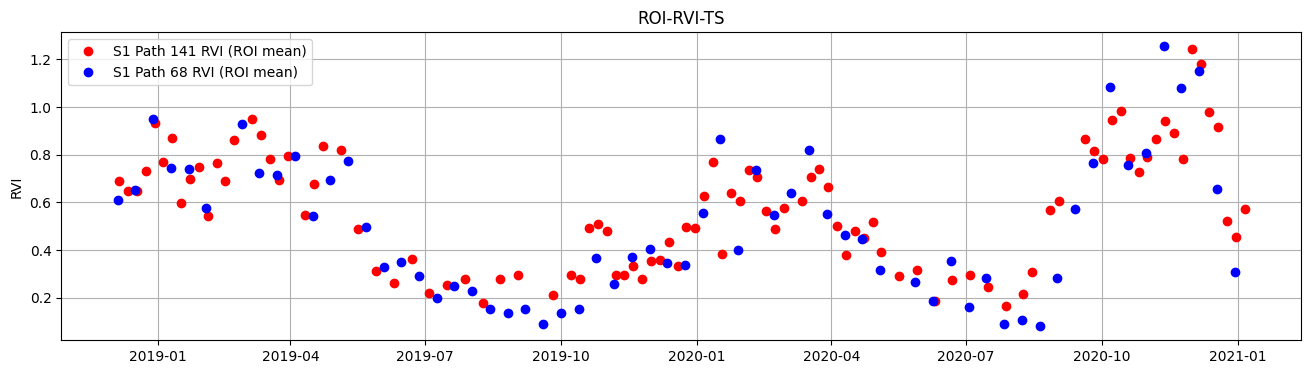

In [41]:
plt.figure(figsize= (16,4))

plt.plot(Dates_S1_P68,S1_RVI_image_P68_nparray_mean,'ro',lw=4)
plt.plot(Dates_S1_P141,S1_RVI_image_P141_nparray_mean,'bo',lw=4)

plt.title('ROI-RVI-TS')
plt.legend(['S1 Path 141 RVI (ROI mean)','S1 Path 68 RVI (ROI mean)'])
plt.ylabel("RVI")
plt.grid(1)
plt.show()

Sentinel-1 Path 68 RVI time series


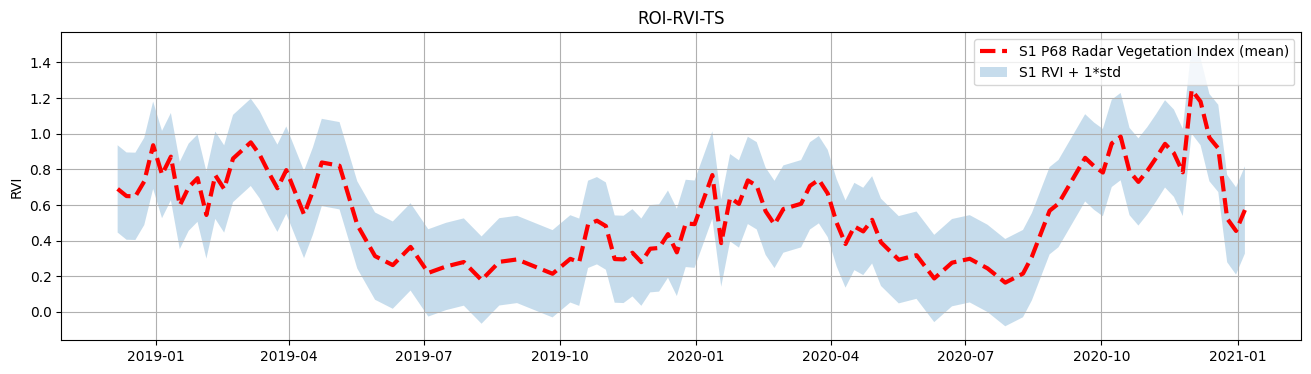

Sentinel-1 Path 141 RVI time series


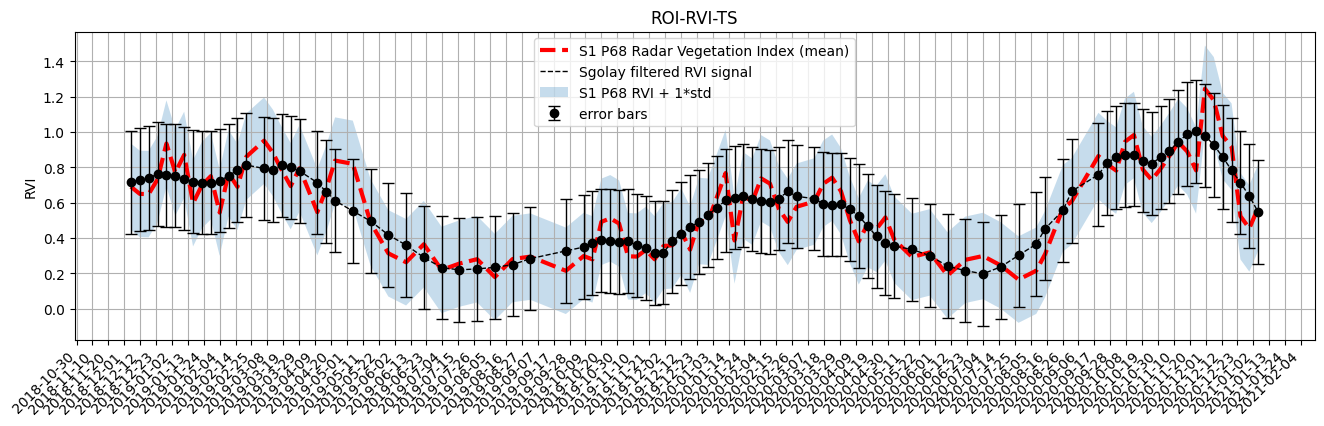

In [42]:
#------------------------------
print('Sentinel-1 Path 68 RVI time series')

plt.figure(figsize= (16,4))
plt.plot(Dates_S1_P68,S1_RVI_image_P68_nparray_mean,'r--',lw=3)
plt.fill_between(Dates_S1_P68,S1_RVI_image_P68_nparray_mean-S1_RVI_image_P68_nparray_std,S1_RVI_image_P68_nparray_mean+S1_RVI_image_P68_nparray_std ,alpha=0.25)
plt.title('ROI-RVI-TS')
plt.legend(['S1 P68 Radar Vegetation Index (mean)','S1 RVI + 1*std'])
plt.grid(1)
plt.ylabel("RVI")
plt.show()

#------------------------------
print('Sentinel-1 Path 141 RVI time series')

S1_RVI_P68_smooth = signal.savgol_filter(S1_RVI_image_P68_nparray_mean, window_length=14, polyorder=2, mode="nearest")

plt.figure(figsize= (16,4))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S1_P68,S1_RVI_image_P68_nparray_mean,'r--',lw=3)
plt.plot(Dates_S1_P68,S1_RVI_P68_smooth,'k--',lw=1)
plt.errorbar(Dates_S1_P68, S1_RVI_P68_smooth, fmt='ko', label="data", yerr=S1_RVI_image_P141_nparray_std, ecolor='black', lw=1,capsize=4)
plt.fill_between(Dates_S1_P68,S1_RVI_image_P68_nparray_mean-S1_RVI_image_P68_nparray_std,S1_RVI_image_P68_nparray_mean+S1_RVI_image_P68_nparray_std ,alpha=0.25)
plt.title('ROI-RVI-TS')
plt.legend(['S1 P68 Radar Vegetation Index (mean)','Sgolay filtered RVI signal','S1 P68 RVI + 1*std','error bars'])
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.ylabel("RVI")
plt.show()

Sentinel-1 Path 68 RVI time series


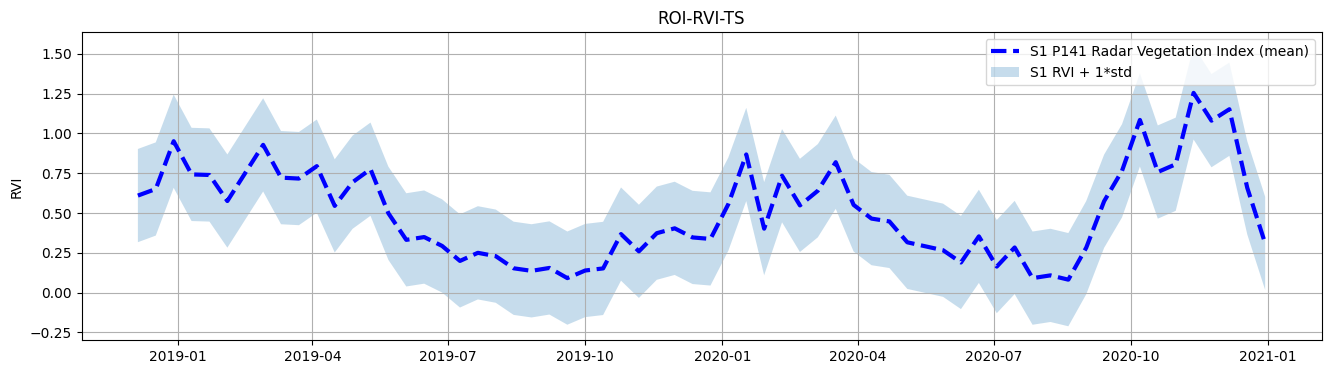

Sentinel-1 Path 141 RVI time series


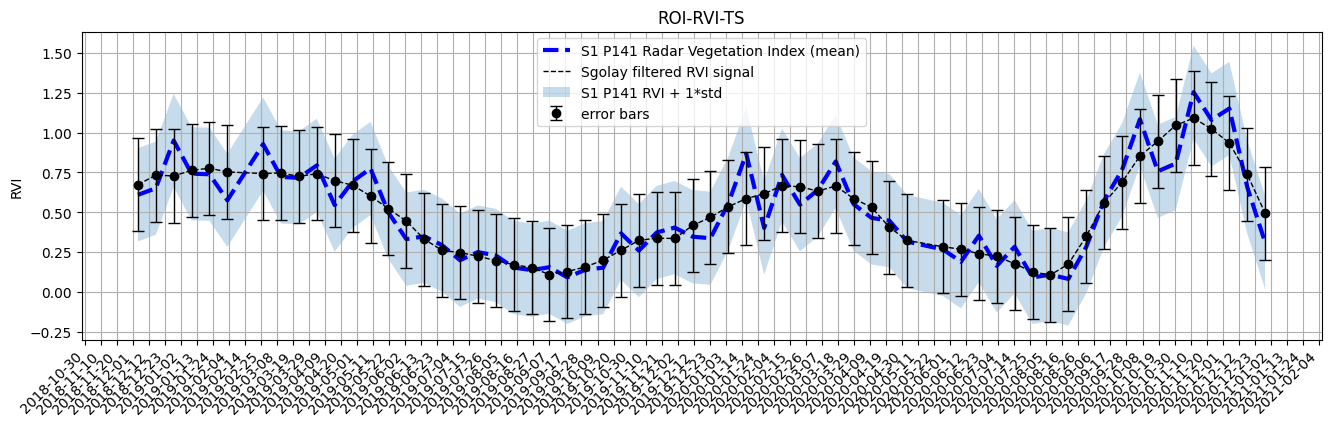

In [43]:
#------------------------------
print('Sentinel-1 Path 68 RVI time series')

plt.figure(figsize= (16,4))
plt.plot(Dates_S1_P141,S1_RVI_image_P141_nparray_mean,'b--',lw=3)
plt.fill_between(Dates_S1_P141,S1_RVI_image_P141_nparray_mean-S1_RVI_image_P141_nparray_std,S1_RVI_image_P141_nparray_mean+S1_RVI_image_P141_nparray_std ,alpha=0.25)
plt.title('ROI-RVI-TS')
plt.legend(['S1 P141 Radar Vegetation Index (mean)','S1 RVI + 1*std'])
plt.grid(1)
plt.ylabel("RVI")
plt.show()
#------------------------------
print('Sentinel-1 Path 141 RVI time series')

S1_RVI_P141_smooth = signal.savgol_filter(S1_RVI_image_P141_nparray_mean, window_length=9, polyorder=2, mode="nearest")

plt.figure(figsize= (16,4))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S1_P141,S1_RVI_image_P141_nparray_mean,'b--',lw=3)
plt.plot(Dates_S1_P141,S1_RVI_P141_smooth,'k--',lw=1)
plt.errorbar(Dates_S1_P141, S1_RVI_P141_smooth, fmt='ko', label="data", yerr=S1_RVI_image_P141_nparray_std, ecolor='black', lw=1,capsize=4)
plt.fill_between(Dates_S1_P141,S1_RVI_image_P141_nparray_mean-S1_RVI_image_P141_nparray_std,S1_RVI_image_P141_nparray_mean+S1_RVI_image_P141_nparray_std ,alpha=0.25)
plt.title('ROI-RVI-TS')
plt.legend(['S1 P141 Radar Vegetation Index (mean)','Sgolay filtered RVI signal','S1 P141 RVI + 1*std','error bars'])
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.ylabel("RVI")
plt.show()

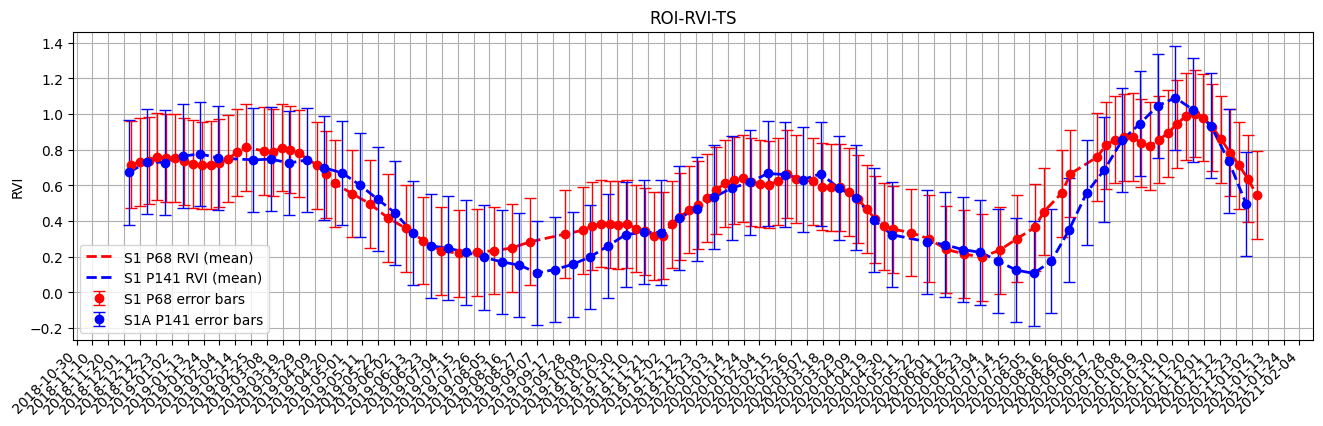

In [44]:
#------------------------------
plt.figure(figsize= (16,4))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S1_P68,S1_RVI_P68_smooth,'r--',lw=2)
plt.errorbar(Dates_S1_P68, S1_RVI_P68_smooth, fmt='ro', label="data", yerr=S1_RVI_image_P68_nparray_std, ecolor='red', lw=1,capsize=4)
plt.plot(Dates_S1_P141,S1_RVI_P141_smooth,'b--',lw=2)
plt.errorbar(Dates_S1_P141,S1_RVI_P141_smooth, fmt='bo', label="data", yerr=S1_RVI_image_P141_nparray_std, ecolor='blue', lw=1,capsize=4)

plt.title('ROI-RVI-TS')
plt.legend(['S1 P68 RVI (mean)','S1 P141 RVI (mean)','S1 P68 error bars','S1A P141 error bars'])
plt.grid(1)
plt.ylabel("RVI")
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
vis_RVI = { 'min': 0,
  'max': 1,
  'palette': [
    '#FFFFFF','#CE7E45','#DF923D','#F1B555','#FCD163','#99B718', '#74A901','#66A000','#529400','#3E8601','#207401','#056201','#004C00','#023B01','#012E01','#011D01', '#011301'
    #'#31a354','#fee391','#fec44f','#fe9929','#d95f0e','#993404'
  ],}

In [46]:
map_center_lat = -39.400633
map_center_lon = -62.639496

Map_S1_RVI = geemap.Map()
Map_S1_RVI = geemap.Map(center=(map_center_lat,map_center_lon), zoom=12)
Map_S1_RVI.set_plot_options(add_marker_cluster=True)
Map_S1_RVI

Map(center=[-39.400633, -62.639496], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HB…

In [47]:
# Single image display

Map_S1_RVI.addLayer(S1_RVI_image_P141.select(image_number), vis_RVI, 'S1 RVI image')

# Image collection display (mean, max or min).

Map_S1_RVI.addLayer(S1_RVI_collection_P141.mean(),vis_RVI, 'S1 RVI collection mean')

# On-screen display of color bars

Map_S1_RVI.add_colorbar(vis_RVI, label="RVI", orientation="horizontal", layer_name="RVI color bar")

# On-screen display of vector shapefile

Map_S1_RVI.addLayer(EEHA_roi, {},'Study area',True, opacity = 0.3)

### **Part-3: MOGPTR algorithm selection for SAR and optical data fusion**

## Multi-Output Gaussian Process Toolkit

The Multi-Output Gaussian Process Toolkit is a Python toolkit for training and interpreting Gaussian process models with multiple data channels. It builds upon PyTorch to provide an easy way to train multi-output models effectively on CPUs and GPUs. The main authors are Taco de Wolff, Alejandro Cuevas, and Felipe Tobar as part of the Center for Mathematical Modelling at the University of Chile.

---

[Multi-Output Gaussian Process Toolkit](https://github.com/GAMES-UChile/mogptk)

**Functions definitions**

In [49]:
class TransformStandard(mogptk.TransformBase):

    # Transform the data so it has mean 0 and variance 1

    def __init__(self):
        pass

    def set_data(self, y, x=None):
        self.mean = y.mean()
        self.std = y.std()

    def forward(self, y, x=None):
        return (y - self.mean) / self.std

    def backward(self, y, x=None):
        return (y * self.std) + self.mean

**Dataset generation**

In [50]:
# From datetime to time-stamps (days since 1900/01/01)
baseDate = datetime(1900,1,1).date()

numericalDates_S2 = []
numericalDates_S1A_P141 = []
numericalDates_S1_P68 = []

numericalDates_S2 = np.asarray([(d - baseDate).days for d in Dates_S2])
numericalDates_S1A_P141 = np.asarray([(d - baseDate).days for d in Dates_S1_P141])
numericalDates_S1_P68 = np.asarray([(d - baseDate).days for d in Dates_S1_P68])

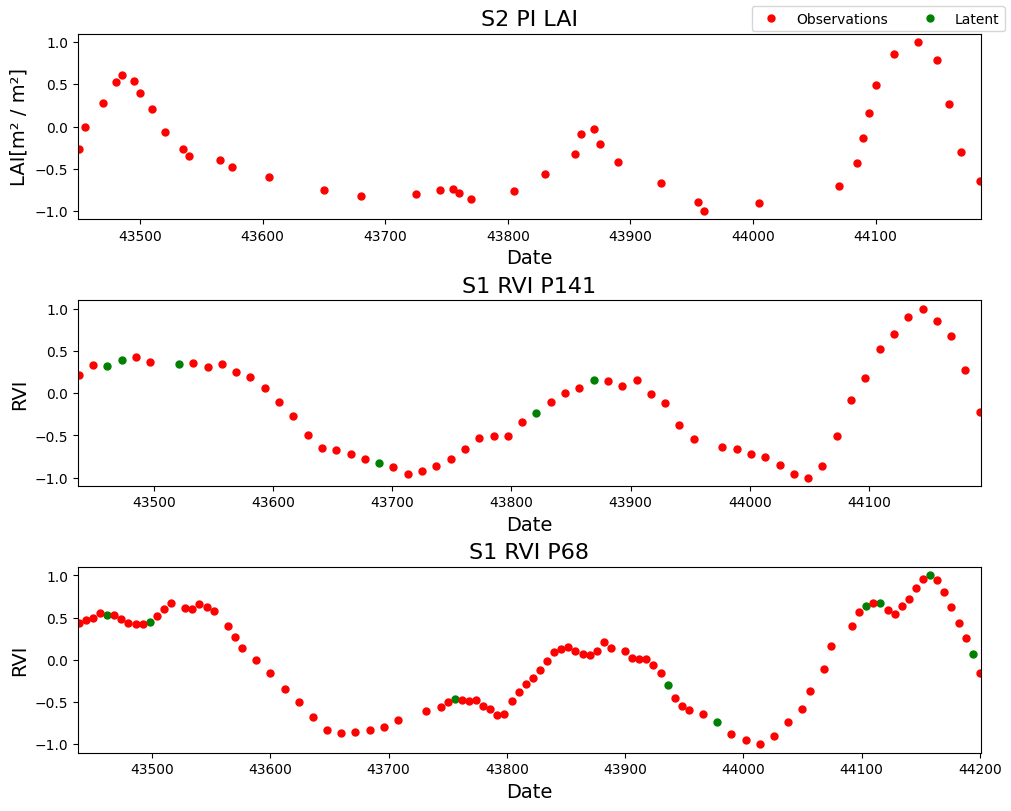

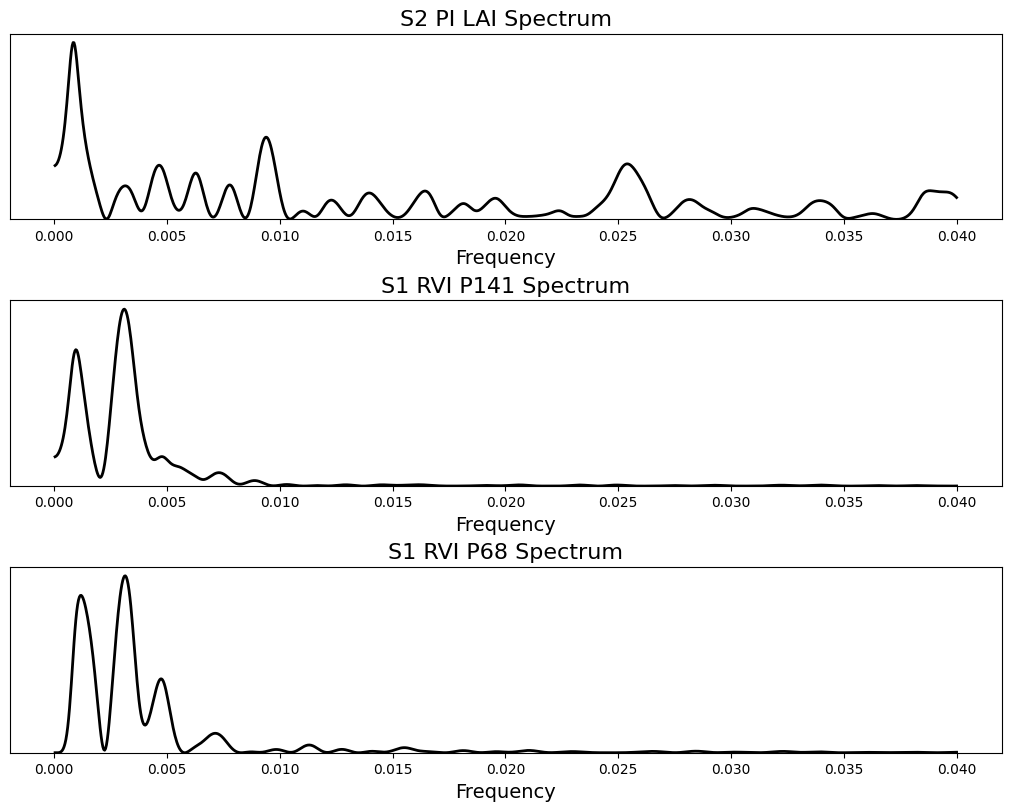

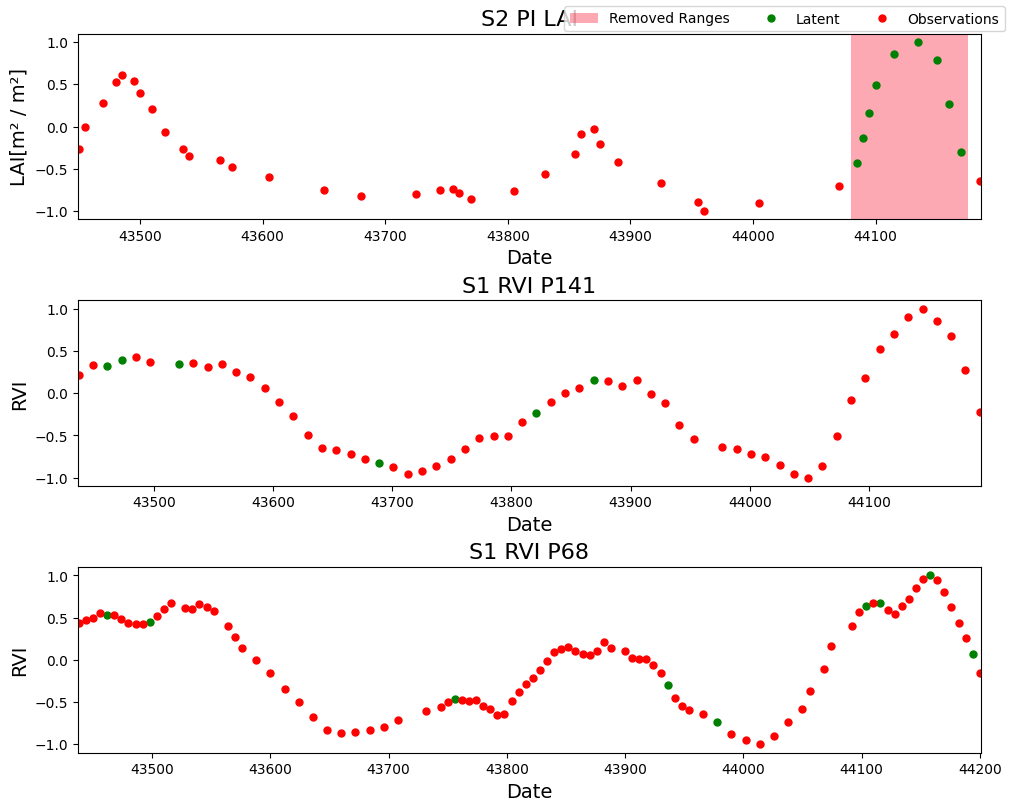

In [56]:
## create dataset
np.random.seed(10)  # for reproducibility

filtering=1;
svg_param = 7;
svg_poly = 2;

if filtering==1:
  Y1 =  signal.savgol_filter(S2_PI_LAI_parcel_mean, window_length=svg_param, polyorder=svg_poly, mode="nearest")
  Y2 = S1_RVI_P141_smooth
  Y3 = S1_RVI_P68_smooth

if filtering==0:
  Y1 = S2_PI_LAI_parcel_mean
  Y2 = S1_RVI_image_P141_nparray_mean
  Y3 = S1_RVI_image_P68_nparray_mean


dataset_S1S2 = mogptk.DataSet(
      mogptk.Data(numericalDates_S2, Y1, x_labels='Date', y_label='LAI[m\N{SUPERSCRIPT TWO} / m\N{SUPERSCRIPT TWO}]', name='S2 PI LAI'),
      mogptk.Data(numericalDates_S1A_P141, Y2, x_labels='Date', y_label='RVI', name='S1 RVI P141'),
      mogptk.Data(numericalDates_S1_P68, Y3, x_labels='Date', y_label='RVI', name='S1 RVI P68'),

)
dataset_S1S2[1].remove_randomly(pct=0.1)
dataset_S1S2[2].remove_randomly(pct=0.1)

dataset_S1S2.transform(mogptk.TransformDetrend(degree=1))
dataset_S1S2.transform(TransformStandard())
dataset_S1S2.transform(mogptk.TransformNormalize())

# Plot dataset

dataset_S1S2.plot('Normalized data set', transformed=True,figsize=(10,8))
dataset_S1S2[0].remove_range(start=44080, end=44175)
dataset_S1S2.plot_spectrum(maxfreq=0.04,figsize=(10,8));
dataset_S1S2.plot('Normalized data set', transformed=True,figsize=(10,8));

nc = len(dataset_S1S2); #number of channels

In [57]:
#valid methods of estimation are BNSE, LS, and SM
#optimizer must be LBFGS, Adam, SGD, or AdaGrad
Q = 4
init_method = 'SM'
method = 'Adam'
lr = 0.1
iters = 500
nc = len(dataset_S1S2); #number of channels

### **Multi-output spectral mixture kernel**

--- 27.95435667037964 seconds ---


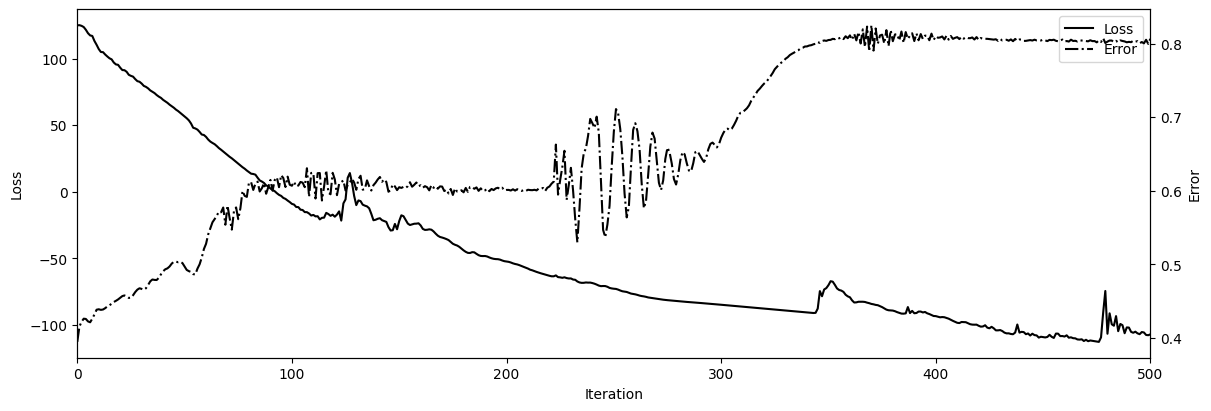

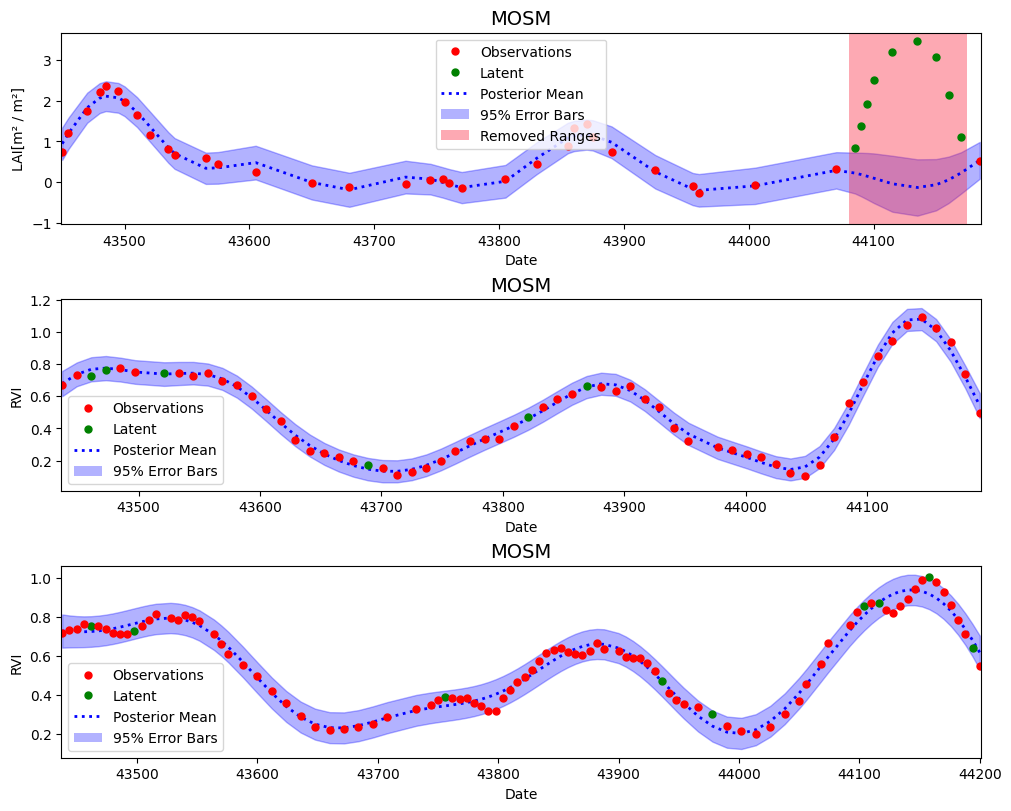

In [58]:
mosm_dataset = dataset_S1S2.copy()

start_time = time.time()

mosm = mogptk.MOSM(mosm_dataset, Q=Q)
mosm.init_parameters(init_method)

mosm.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
mosm.plot_prediction(title='MOSM',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [59]:
mosm_mae = np.zeros((1,nc))
mosm_rmse = np.zeros((1,nc))
mosm_mape = np.zeros((1,nc))

mosm_error = mogptk.error(mosm, per_channel=True)[0]
mosm_mae[:] = np.array([item['MAE'] for item in mosm_error])
mosm_rmse[:] = np.array([item['RMSE'] for item in mosm_error])
mosm_mape[:] = np.array([item['MAPE'] for item in mosm_error])

mogptk.error(mosm, disp=True, per_channel=True);
print('\n')

MAE       MAPE      RMSE
Name                                         
MOSM channel 1  2.101311  92.519593  2.334158
MOSM channel 2  0.016361   4.167162  0.020377
MOSM channel 3  0.039110   6.921075  0.046548

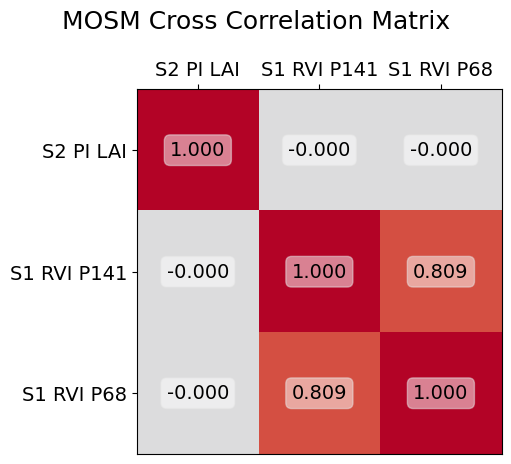

In [61]:
mosm.plot_correlation(title='MOSM Cross Correlation Matrix',figsize=(5, 5));

### **Cross spectral mixture kernel**

--- 49.70664095878601 seconds ---


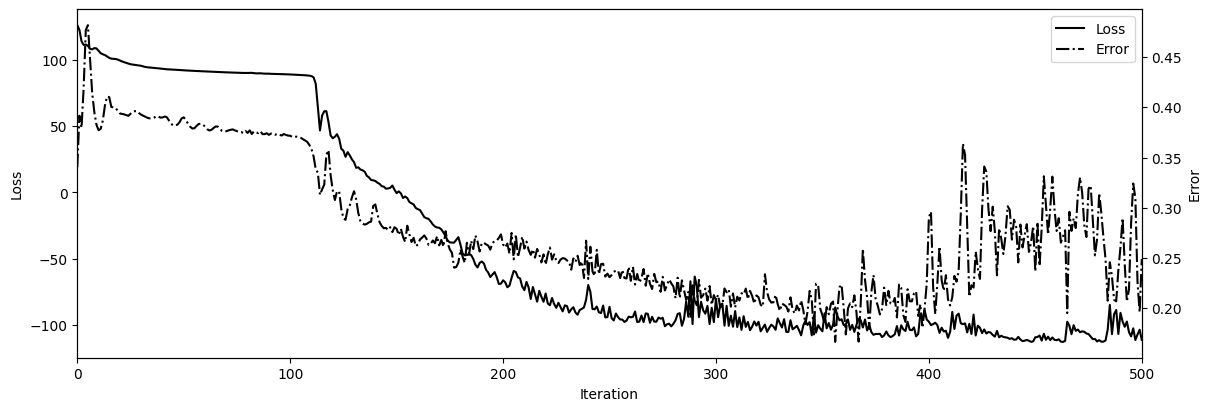

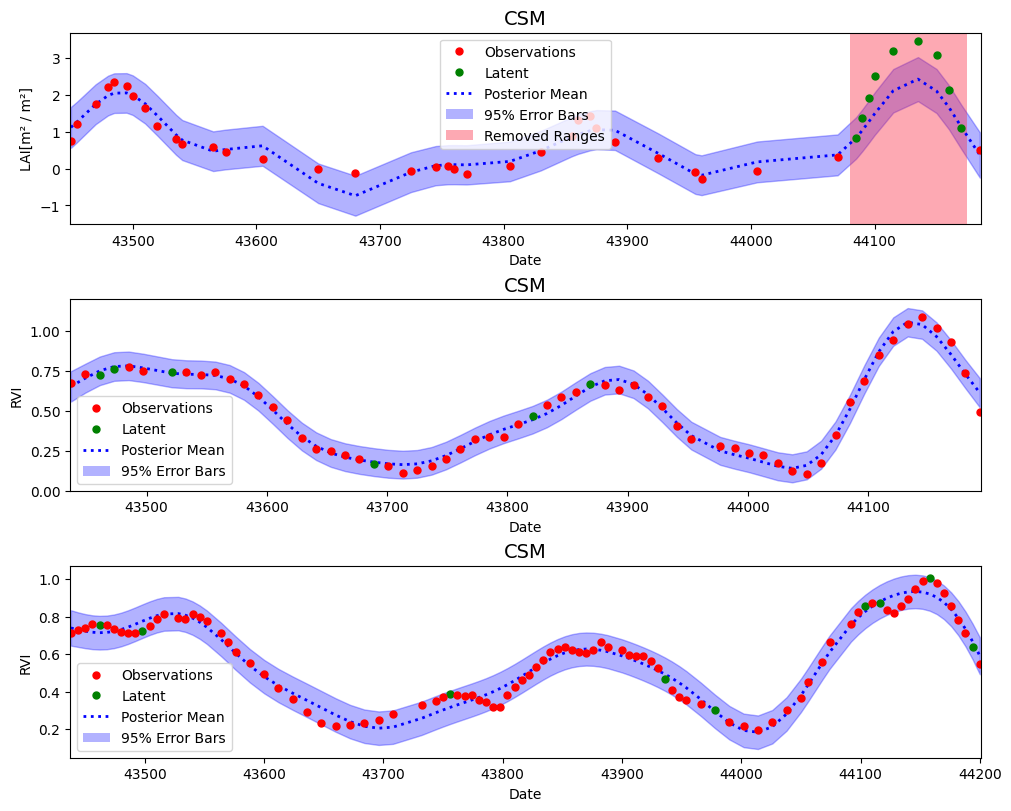

In [62]:
csm_dataset = dataset_S1S2.copy()

start_time = time.time()

csm = mogptk.CSM(csm_dataset, Q=Q)
csm.init_parameters(init_method)

csm.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
csm.plot_prediction(title='CSM',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [63]:
csm_mae = np.zeros((1,nc))
csm_rmse = np.zeros((1,nc))
csm_mape = np.zeros((1,nc))

csm_error = mogptk.error(csm, per_channel=True)[0]
csm_mae[:] = np.array([item['MAE'] for item in csm_error])
csm_rmse[:] = np.array([item['RMSE'] for item in csm_error])
csm_mape[:] = np.array([item['MAPE'] for item in csm_error])

mogptk.error(csm, disp=True, per_channel=True);

MAE       MAPE      RMSE
Name                                        
CSM channel 1  0.615973  24.102952  0.738290
CSM channel 2  0.015477   3.089210  0.016805
CSM channel 3  0.037642   6.066399  0.045014

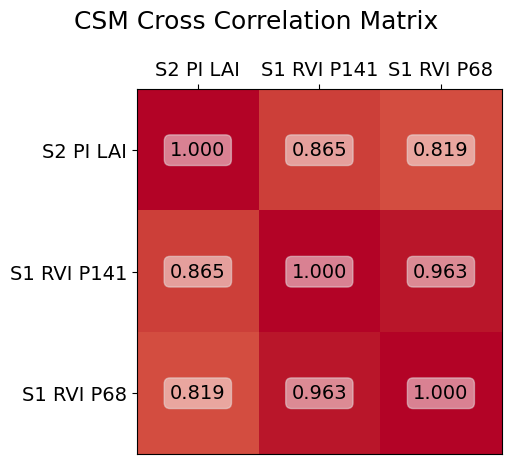

In [64]:
csm.plot_correlation(title='CSM Cross Correlation Matrix',figsize=(5, 5));

### **Linear model of coregionalization with spectral mixture kernels**

--- 34.70002627372742 seconds ---


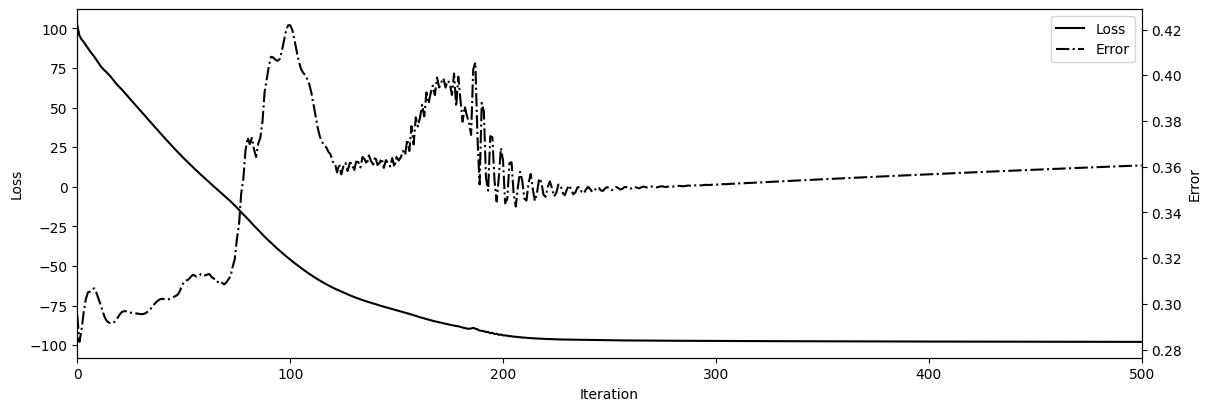

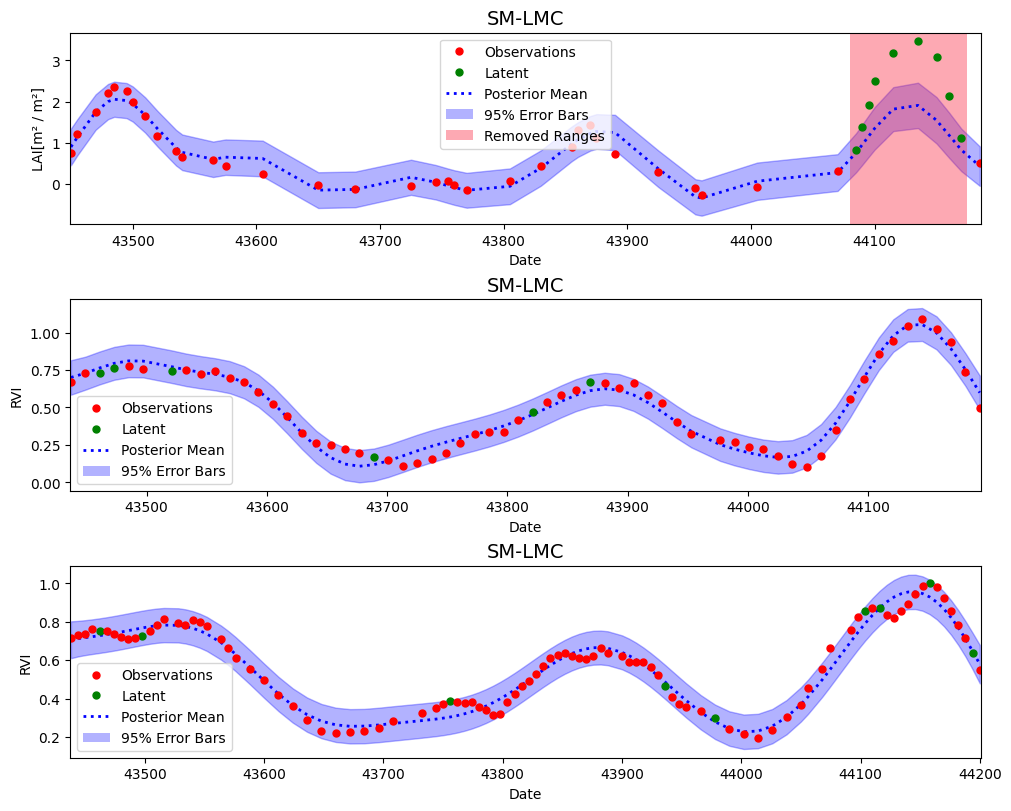

In [65]:
smlmc_dataset = dataset_S1S2.copy()

start_time = time.time()

smlmc = mogptk.SM_LMC(smlmc_dataset, Q=Q)
smlmc.init_parameters(init_method)

smlmc.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
smlmc.plot_prediction(title='SM-LMC',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [66]:
smlmc_mae = np.zeros((1,nc))
smlmc_rmse = np.zeros((1,nc))
smlmc_mape = np.zeros((1,nc))

smlmc_error = mogptk.error(smlmc, per_channel=True)[0]
smlmc_mae[:] = np.array([item['MAE'] for item in smlmc_error])
smlmc_rmse[:] = np.array([item['RMSE'] for item in smlmc_error])
smlmc_mape[:] = np.array([item['MAPE'] for item in smlmc_error])

mogptk.error(smlmc, disp=True, per_channel=True);
print('\n')

MAE       MAPE      RMSE
Name                                           
SM-LMC channel 1  0.899713  37.002121  1.038452
SM-LMC channel 2  0.036271   9.161767  0.038741
SM-LMC channel 3  0.037690   6.467151  0.046741

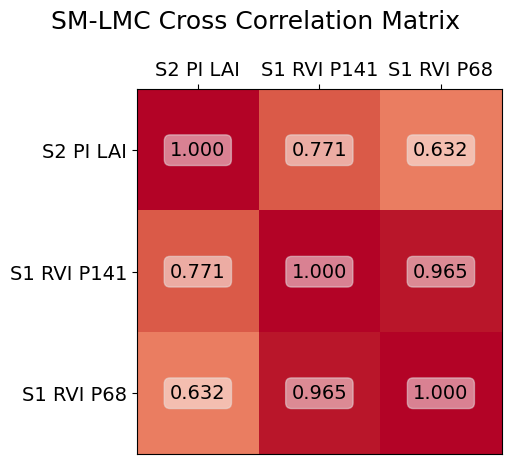

In [67]:
smlmc.plot_correlation(title='SM-LMC Cross Correlation Matrix',figsize=(5, 5));

###**Convolutional Gaussian kernel**

--- 65.98045444488525 seconds ---


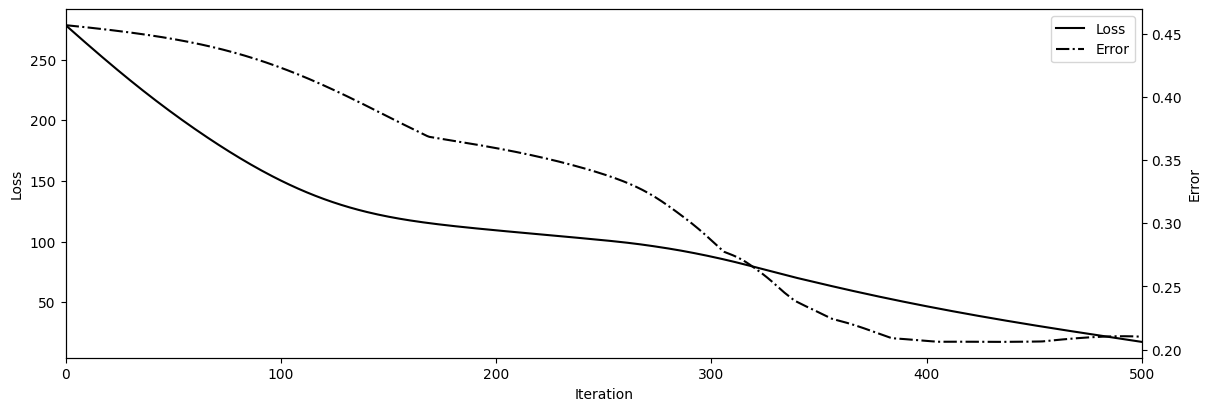

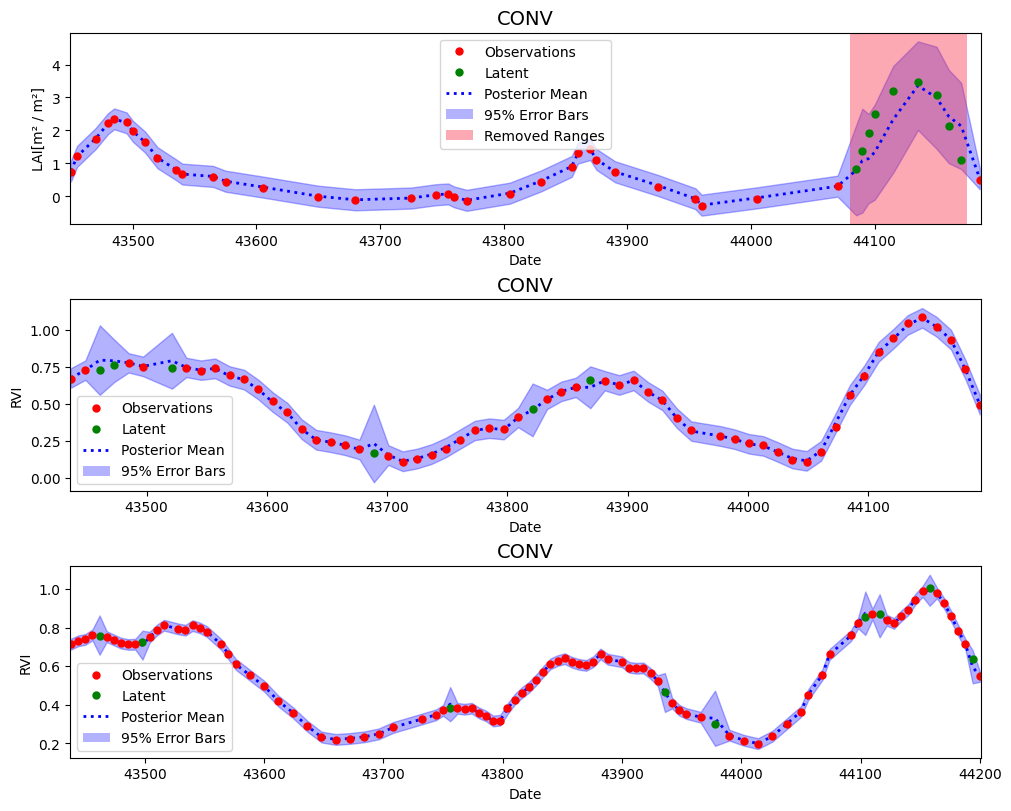

In [68]:
conv_dataset = dataset_S1S2.copy()

start_time = time.time()

conv = mogptk.CONV(conv_dataset, Q=Q)
conv.init_parameters(init_method)

conv.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True,)
conv.plot_prediction(title='CONV',figsize=(10,8));

print("--- %s seconds ---" % (time.time() - start_time))

In [69]:
conv_mae = np.zeros((1,nc))
conv_rmse = np.zeros((1,nc))
conv_mape = np.zeros((1,nc))

conv_error = mogptk.error(conv, per_channel=True)[0]
conv_mae[:] = np.array([item['MAE'] for item in conv_error])
conv_rmse[:] = np.array([item['RMSE'] for item in conv_error])
conv_mape[:] = np.array([item['MAPE'] for item in conv_error])

mogptk.error(conv, disp=True, per_channel=True);
print('\n')

MAE       MAPE      RMSE
Name                                         
CONV channel 1  0.512770  27.822296  0.658072
CONV channel 2  0.045495  11.123774  0.050332
CONV channel 3  0.017259   3.277183  0.020408

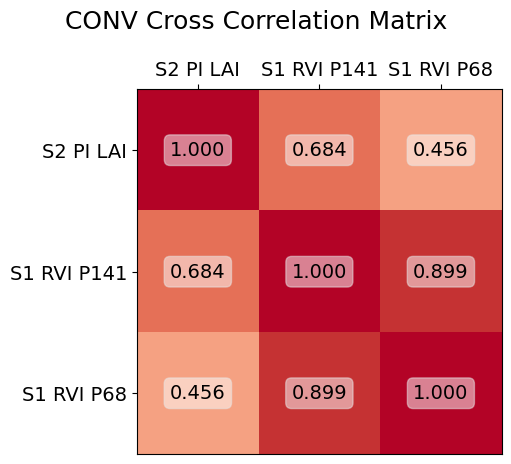

In [70]:
conv.plot_correlation(title='CONV Cross Correlation Matrix',figsize=(5, 5));

### **Independent spectral mixture kernels**

--- 16.595218420028687 seconds ---


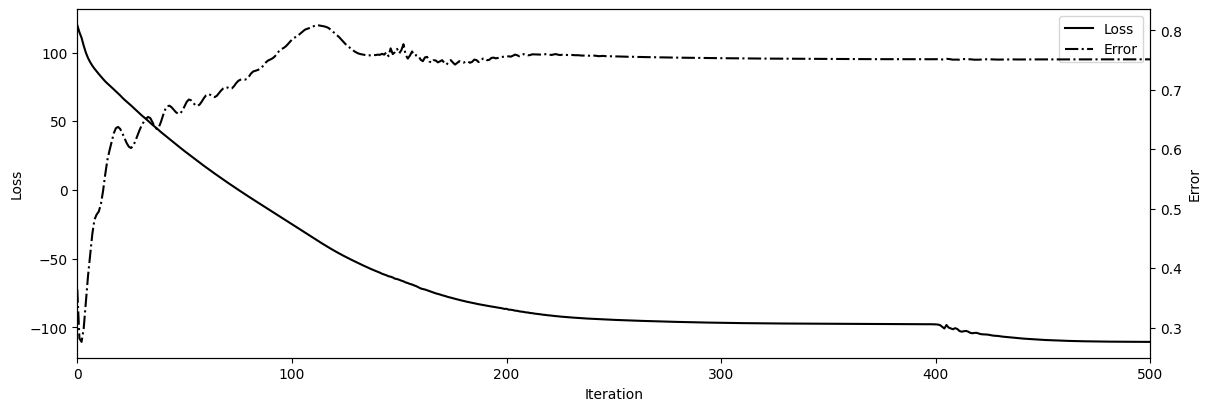

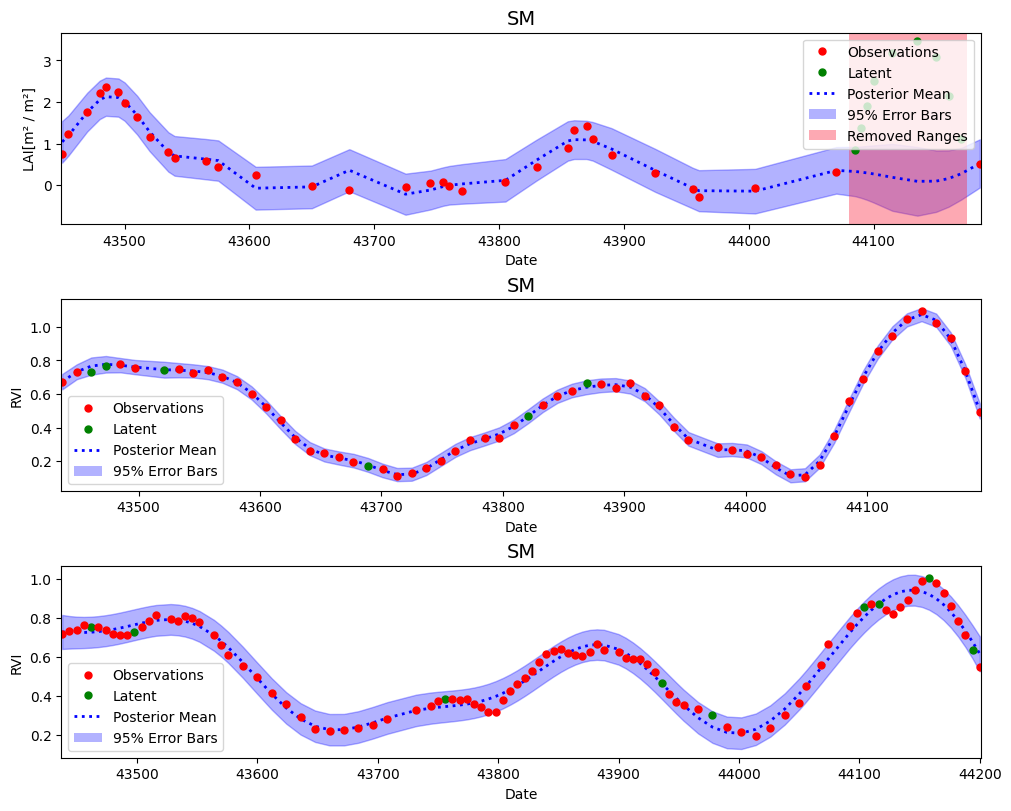

In [71]:
#valid methods of estimation are IPS, LS, and BNSE

init_method_sm = 'BNSE'
sm_dataset = dataset_S1S2.copy()

start_time = time.time()

sm = mogptk.SM(sm_dataset, Q=Q)
sm.init_parameters(init_method_sm)

sm.train(method=method, lr=lr, iters=iters, verbose=False, error='MAE',plot=True)
sm.plot_prediction(title='SM',figsize=(10,8))

print("--- %s seconds ---" % (time.time() - start_time))

In [73]:
sm_mae = np.zeros((1,nc))
sm_rmse = np.zeros((1,nc))
sm_mape = np.zeros((1,nc))

sm_error = mogptk.error(sm, per_channel=True)[0]
sm_mae[:] = np.array([item['MAE'] for item in sm_error])
sm_rmse[:] = np.array([item['RMSE'] for item in sm_error])
sm_mape[:] = np.array([item['MAPE'] for item in sm_error])

mogptk.error(sm, disp=True, per_channel=True);
print('\n')

MAE       MAPE      RMSE
Name                                       
SM channel 1  1.955500  85.385058  2.182833
SM channel 2  0.014301   2.484426  0.019827
SM channel 3  0.038512   6.774795  0.045517

### **Results**

In [74]:
print('RMSE errors per model - General')
print('MOSM:    %g ± %g' % (mosm_rmse.mean(1).mean(), mosm_rmse.mean(1).std()))
print('CSM:     %g ± %g' % (csm_rmse.mean(1).mean(), csm_rmse.mean(1).std()))
print('SM-LMC:  %g ± %g' % (smlmc_rmse.mean(1).mean(), smlmc_rmse.mean(1).std()))
print('CONV:    %g ± %g' % (conv_rmse.mean(1).mean(), conv_rmse.mean(1).std()))
print('SM:      %g ± %g' % (sm_rmse.mean(1).mean(), sm_rmse.mean(1).std()))

print('\n')

print('RMSE errors per model - Channel 0')
print('MOSM:    %g' % (mosm_rmse[0,0]))
print('CSM:     %g' % (csm_rmse[0,0]))
print('SM-LMC:  %g' % (smlmc_rmse[0,0]))
print('CONV:    %g' % (conv_rmse[0,0]))
print('SM:      %g' % (sm_rmse[0,0]))

print('\n')

print('MAE errors per model - Channel 0')
print('MOSM:    %g' % (mosm_mae[0,0]))
print('CSM:     %g' % (csm_mae[0,0]))
print('SM-LMC:  %g' % (smlmc_mae[0,0]))
print('CONV:    %g' % (conv_mae[0,0]))
print('SM:      %g' % (sm_mae[0,0]))

print('\n')

print('MAPE errors per model - Channel 0')
print('MOSM:    %g' % (mosm_mape[0,0]))
print('CSM:     %g' % (csm_mape[0,0]))
print('SM-LMC:  %g' % (smlmc_mape[0,0]))
print('CONV:    %g' % (conv_mape[0,0]))
print('SM:      %g' % (sm_mape[0,0]))

RMSE errors per model - General
MOSM:    0.800361 ± 0
CSM:     0.266703 ± 0
SM-LMC:  0.374645 ± 0
CONV:    0.242937 ± 0
SM:      0.749392 ± 0


RMSE errors per model - Channel 0
MOSM:    2.33416
CSM:     0.73829
SM-LMC:  1.03845
CONV:    0.658072
SM:      2.18283


MAE errors per model - Channel 0
MOSM:    2.10131
CSM:     0.615973
SM-LMC:  0.899713
CONV:    0.51277
SM:      1.9555


MAPE errors per model - Channel 0
MOSM:    92.5196
CSM:     24.103
SM-LMC:  37.0021
CONV:    27.8223
SM:      85.3851


In [75]:
pd.DataFrame(np.c_[mosm_mae[0,0],csm_mae[0,0],smlmc_mae[0,0],conv_mae[0,0],sm_mae[0,0]],
             columns=['MOSM-MAE', 'CSM-MAE', 'SM-LMC-MAE', 'CONV-MAE', 'SM-MAE'])

MOSM-MAE   CSM-MAE  SM-LMC-MAE  CONV-MAE  SM-MAE
0  2.101311  0.615973    0.899713   0.51277  1.9555

In [76]:
xtest, ytest = dataset_S1S2.get_test_data()
xtrain, ytrain = dataset_S1S2.get_train_data()
tpred = dataset_S1S2.get_prediction_data()
x, y_mean, y_var_lower, y_var_upper = conv.predict(sigma=1)

Recovered Sentinel-1 time series


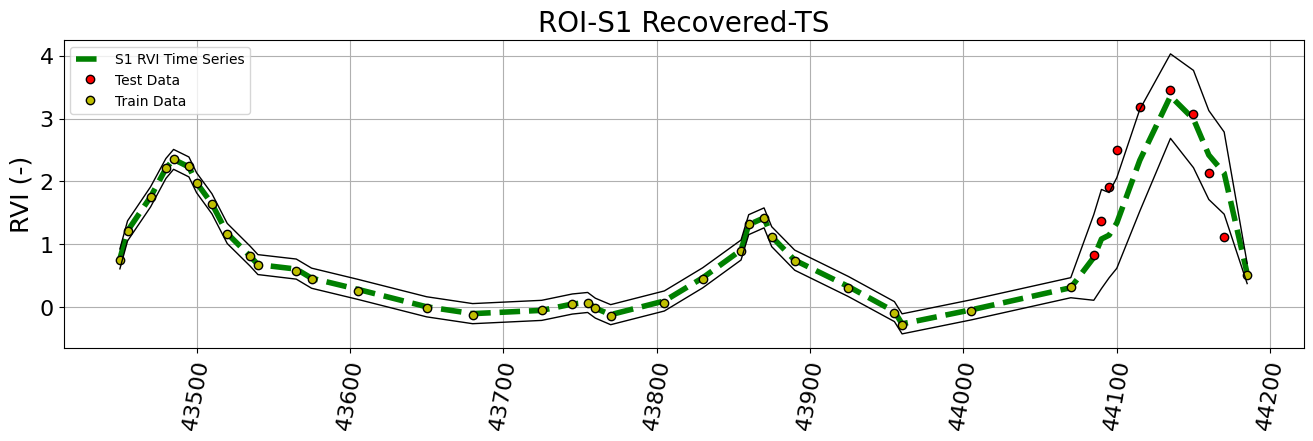

In [77]:
print('Recovered Sentinel-1 time series')

plt.figure(figsize= (16,4))
plt.plot(np.asarray(x[0]),y_mean[0],'--g', lw=4)
plt.plot(np.asarray(xtest[0]),ytest[0],linestyle="",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=6, lw=4)
plt.plot(np.asarray(xtrain[0]),ytrain[0],linestyle="",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=6, lw=4)
#plt.fill_between(np.asarray(x[0]),y_var_lower[0],y_var_upper[0] ,alpha=0.25)
plt.plot(np.asarray(x[0]),y_var_lower[0],'-k', lw=1)
plt.plot(np.asarray(x[0]),y_var_upper[0],'-k', lw=1)
plt.title('ROI-S1 Recovered-TS',fontsize=20)
plt.ylabel("RVI (-)",fontsize=18)
plt.legend(['S1 RVI Time Series','Test Data','Train Data'])
plt.xticks(rotation=80,fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

In [78]:
x, y_mean_mosm, y_var_lower_mosm, y_var_upper_mosm = mosm.predict(sigma=1)
x, y_mean_csm, y_var_lower_csm, y_var_upper_csm = csm.predict(sigma=1)
x, y_mean_sm, y_var_lower_sm, y_var_upper_sm = sm.predict(sigma=1)
x, y_mean_conv, y_var_lower_conv, y_var_upper_conv = conv.predict(sigma=1)
x, y_mean_smlmc, y_var_lower_smlmc, y_var_upper_smlmc = smlmc.predict(sigma=1)

print('S2 time series length',(np.asarray(y_mean_csm[0])).shape)
print('S1A Path 141 time series length',(np.asarray(y_mean_csm[1])).shape)
print('S1 Path 68 time series length',(np.asarray(y_mean_csm[2])).shape)

S2 time series length (43,)
S1A Path 141 time series length (62,)
S1 Path 68 time series length (99,)


In [82]:
#Numpy array to datetime conversion
#https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

import datetime

"""
C=[None] * numericalDates_S2.shape[0]
for i in range(numericalDates_S2.shape[0]):
  aux = int(numericalDates_S2[i]);
  A = datetime.timedelta(days = aux)
  B = A + baseDate
  C[i] = B
"""
S2_X_test=[None] * xtest[0].shape[0]
for i in range(xtest[0].shape[0]):
  aux = int(xtest[0][i]);
  A = datetime.timedelta(days = aux)
  B = A + baseDate
  S2_X_test[i] = B

S2_X_train=[None] * xtrain[0].shape[0]
for i in range(xtrain[0].shape[0]):
  aux = int(xtrain[0][i]);
  A = datetime.timedelta(days = aux)
  B = A + baseDate
  S2_X_train[i] = B

Recovered Sentinel-2 time series


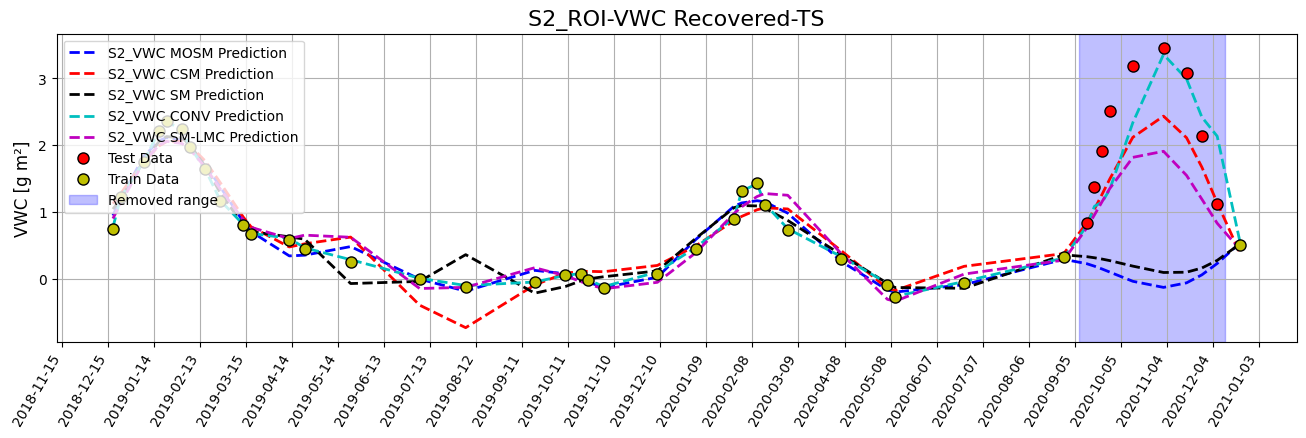

In [84]:
print('Recovered Sentinel-2 time series')

S2_rem_start_date = datetime.timedelta(days = 44080) + baseDate
S2_rem_end_date = datetime.timedelta(days = 44175) + baseDate

plt.figure(figsize= (16,4))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,y_mean_mosm[0],'--b', lw=2)
plt.plot(Dates_S2,y_mean_csm[0],'--r', lw=2)
plt.plot(Dates_S2,y_mean_sm[0],'--k', lw=2)
plt.plot(Dates_S2,y_mean_conv[0],'--c', lw=2)
plt.plot(Dates_S2,y_mean_smlmc[0],'--m', lw=2)
plt.plot(S2_X_test,ytest[0],linestyle="",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=8, lw=1)
plt.plot(S2_X_train,ytrain[0],linestyle="",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=8, lw=1)
plt.axvspan(S2_rem_start_date, S2_rem_end_date, alpha=0.25, color='blue')

plt.title('S2_ROI-VWC Recovered-TS',fontsize=16)
plt.ylabel("VWC [g m\N{SUPERSCRIPT TWO}]",fontsize=12)
plt.legend(['S2_VWC MOSM Prediction','S2_VWC CSM Prediction','S2_VWC SM Prediction','S2_VWC CONV Prediction','S2_VWC SM-LMC Prediction','Test Data','Train Data','Removed range'], loc='upper left')

plt.xticks(rotation=60,ha='right')
#plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### **WHITTAKER SMOOTHING**

In [ ]:
mogpr_in1 = S2_PI_LAI_image_nparray.reshape(S2_PI_LAI_image_nparray.shape[0]*S2_PI_LAI_image_nparray.shape[1], S2_PI_LAI_image_nparray.shape[2])
mogpr_in2 = S1_RVI_image_P68_nparray.reshape(S1_RVI_image_P68_nparray.shape[0]* S1_RVI_image_P68_nparray.shape[1], S1_RVI_image_P68_nparray.shape[2])
mogpr_in3 = S1_RVI_image_P141_nparray.reshape(S1_RVI_image_P141_nparray.shape[0]*S1_RVI_image_P141_nparray.shape[1],S1_RVI_image_P141_nparray.shape[2])
print('MOGPR_in1(size):' , mogpr_in1.shape)
print('MOGPR_in2(size):' ,mogpr_in2.shape)
print('MOGPR_in3(size):' ,mogpr_in3.shape)

In [89]:
# create weights for Whittaker smoothing
Y1_Ws = mogpr_in1
Y2_Ws_in = mogpr_in2
Y3_Ws_in = mogpr_in3

w2 =  np.array((S1_RVI_image_P68_nparray_mean!=-3000)*1,dtype='double')
w3 =  np.array((S1_RVI_image_P141_nparray_mean!=-3000)*1,dtype='double')

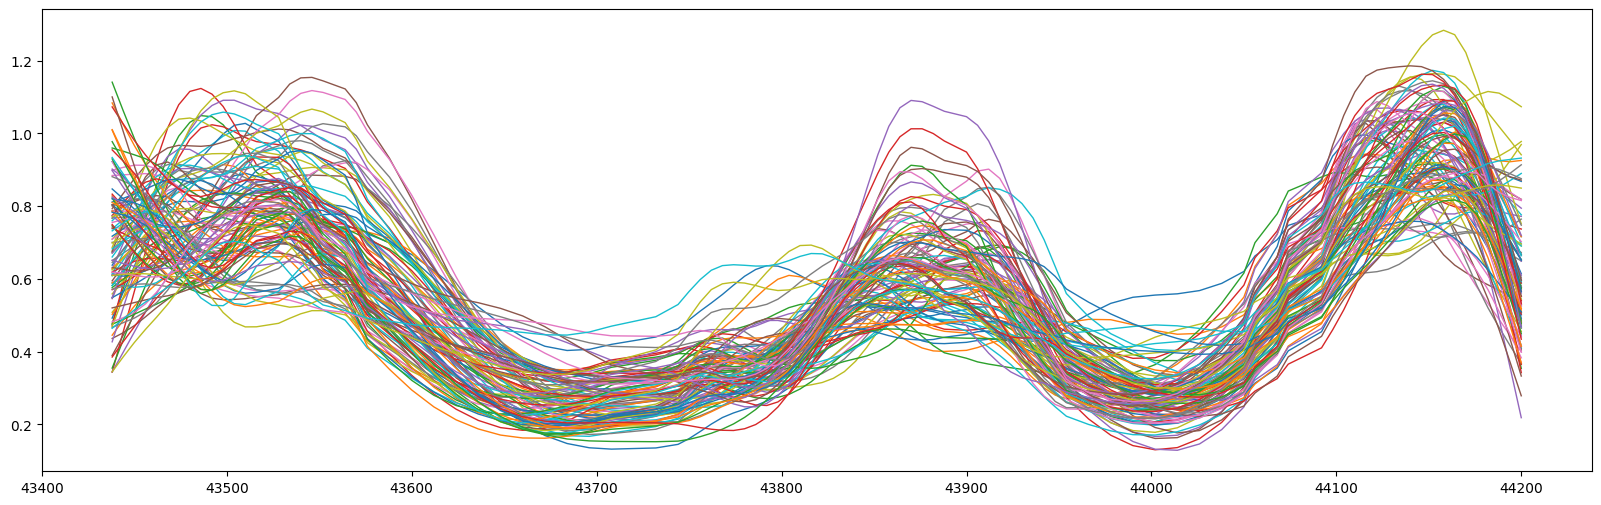

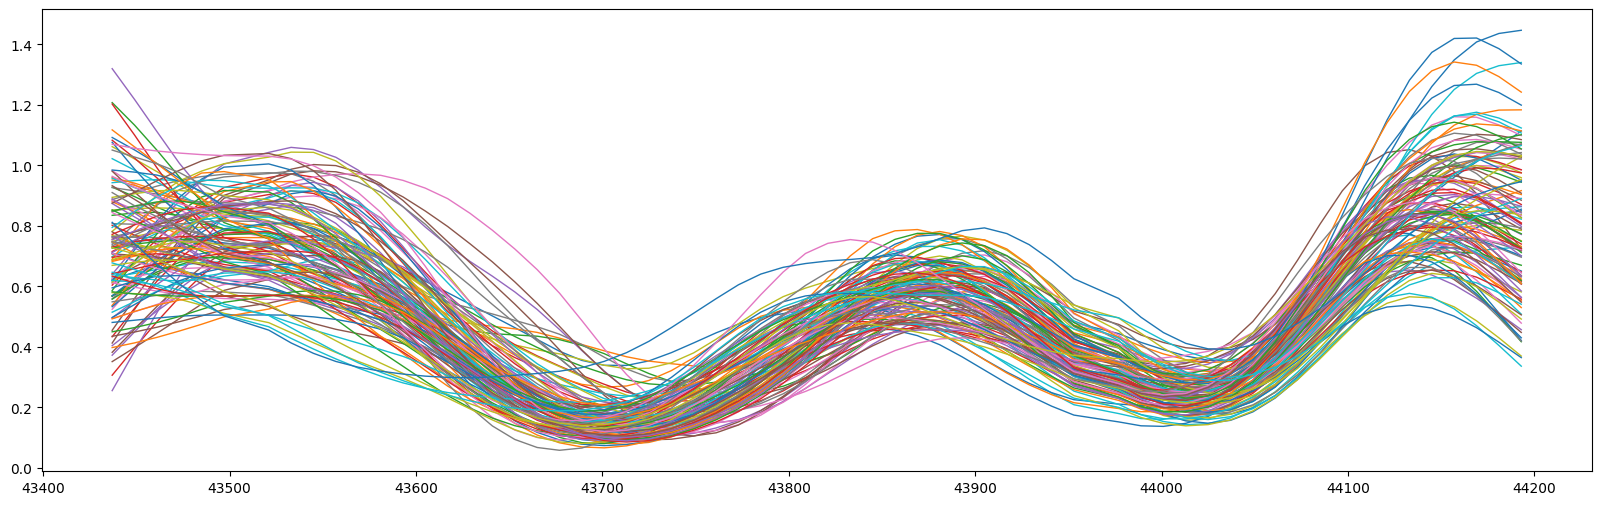

In [90]:
# Apply Whittaker filter
d = 75

Y2_Ws_out = []
for i in range (Y2_Ws_in.shape[0]):
    y_aux = Y2_Ws_in[i,:]
    YW = ws2d(y_aux,d,w2)
    Y2_Ws_out.append(YW)
Y2_Ws_out = np.array(Y2_Ws_out)

Y3_Ws_out = []
for i in range (Y3_Ws_in.shape[0]):
    y_aux = Y3_Ws_in[i,:]
    YW = ws2d(y_aux,d,w3)
    Y3_Ws_out.append(YW)
Y3_Ws_out = np.array(Y3_Ws_out)

plt.figure(figsize= (20,6))
for i in range (Y2_Ws_out.shape[0]):
    plt.plot(numericalDates_S1_P68,Y2_Ws_out[i,:], lw=1)
    #time.sleep(0.05)

plt.figure(figsize= (20,6))
for i in range (Y3_Ws_out.shape[0]):
    plt.plot(numericalDates_S1A_P141,Y3_Ws_out[i,:], lw=1)
    #time.sleep(0.05)

In [91]:
#Create a list of datasets for MOGPR
dataset_S1S2_Ws_pixels = []
for i in range (Y1_Ws.shape[0]):

    aux_dataset = mogptk.DataSet(mogptk.Data(numericalDates_S2, Y1_Ws[i,:], name='S2 NDVI Time Series'),
                                 mogptk.Data(numericalDates_S1_P68, Y2_Ws_out[i,:], name='S1 P68 RVI Time Series'),
                                 mogptk.Data(numericalDates_S1A_P141, Y3_Ws_out[i,:], name='S1A P141 RVI Time Series'),

    )
    dataset_S1S2_Ws_pixels.append(aux_dataset)

for i in range (Y1_Ws.shape[0]):
    dataset_S1S2_Ws_pixels[i].transform(mogptk.TransformDetrend(degree=1))
    dataset_S1S2_Ws_pixels[i].transform(TransformStandard())
    dataset_S1S2_Ws_pixels[i].transform(mogptk.TransformNormalize())

# remove second half of the first channel
for i in range (Y1_Ws.shape[0]):
    dataset_S1S2_Ws_pixels[i][0].remove_range(start=44080, end=44175)

In [ ]:
#Train model for each pixel in the dataset

global_start_time = time.time()
model_pixel =[]
for i in range (Y1_Ws.shape[0]):
    start_time = time.time()
    aux_model = mogptk.CONV(dataset_S1S2_Ws_pixels[i], Q=Q)
    aux_model.init_parameters(init_method)
    aux_model.train(method=method,iters=500, lr=lr,
          verbose=False, error='MAE', plot=False)
    aux_model.predict()
    model_pixel.append(aux_model)
    print("--- %s seconds ---" % (time.time() - start_time))

print("--- %s seconds ---" % (time.time() - global_start_time))

#Save prediction for each model at pixel level
x = []
y_mean = []
y_var_lower = []
y_var_upper = []

for i in range (Y1_Ws.shape[0]):
    x_aux, y_mean_aux, y_var_lower_aux, y_var_upper_aux = model_pixel[i].predict(sigma=1)
    x.append(x_aux)
    y_mean.append(y_mean_aux)
    y_var_lower.append(y_var_lower_aux)
    y_var_upper.append(y_var_upper_aux)

#Create an image numpy array
A_aux=pd.DataFrame(y_mean)
S2_VWC_recovered =[]
for i in range (Y1_Ws.shape[0]):
    S2_recovered_aux=np.asarray(A_aux[0][i])
    S2_VWC_recovered.append(S2_recovered_aux)

In [ ]:
S2_VWC_recovered_array=np.asarray(S2_VWC_recovered)
S2_VWC_recovered_array_image = S2_VWC_recovered_array.reshape(S2_PI_LAI_image_nparray.shape[0],S2_PI_LAI_image_nparray.shape[1],S2_PI_LAI_image_nparray.shape[2])

#Save the numpy array to Google Drive

"""
file_save_name = 'S2_VWC_recovered_array_image.mat'
file_path = F"/content/drive/My Drive/{file_save_name}"
scipy.io.savemat(file_path, {'data': S2_VWC_recovered_array_image})

"""

Recovered S2 VWC time series


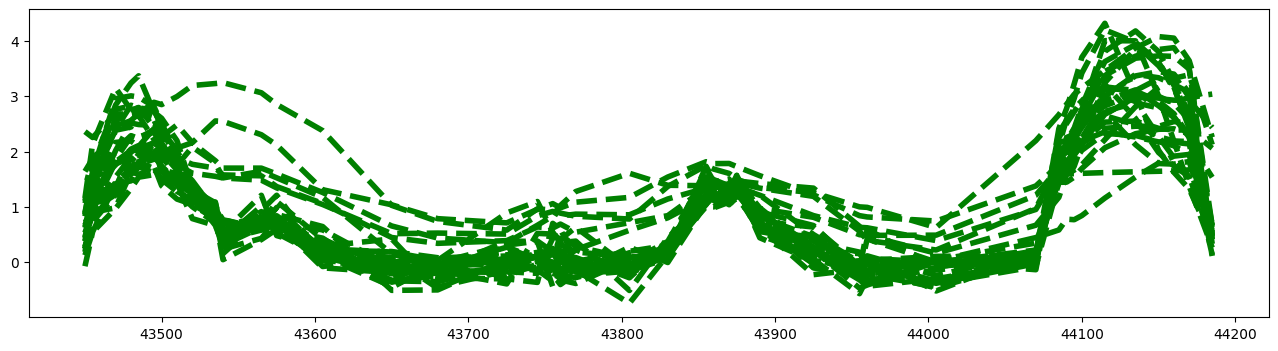

In [94]:
print('Recovered S2 VWC time series')

plt.figure(figsize= (16,4))
for i in range (Y1_Ws.shape[0]):
    plt.plot(np.asarray(x[i][0]),y_mean[i][0],'--g', lw=4)

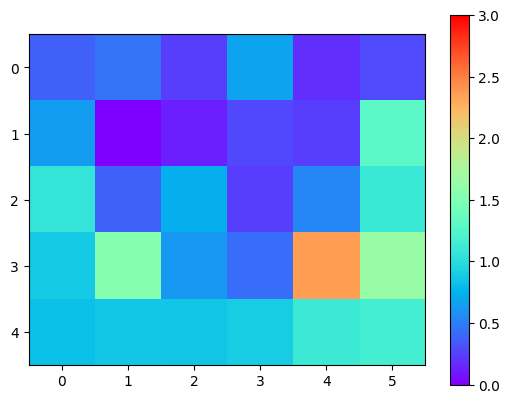

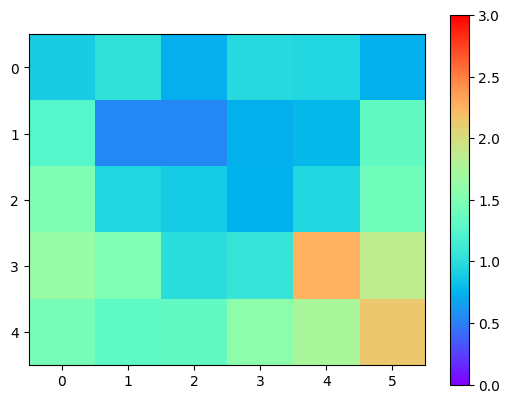

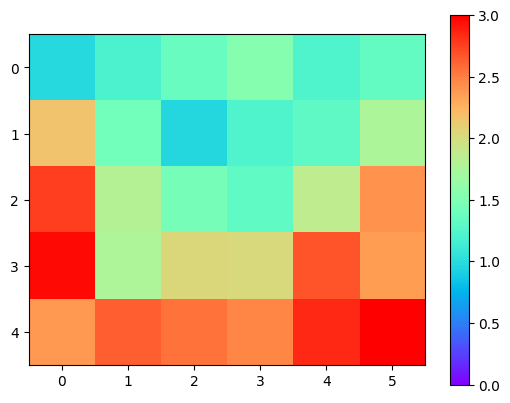

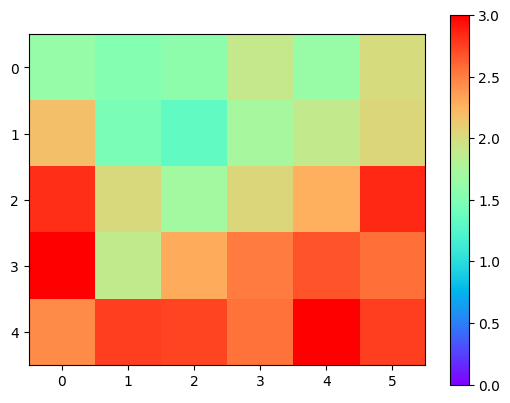

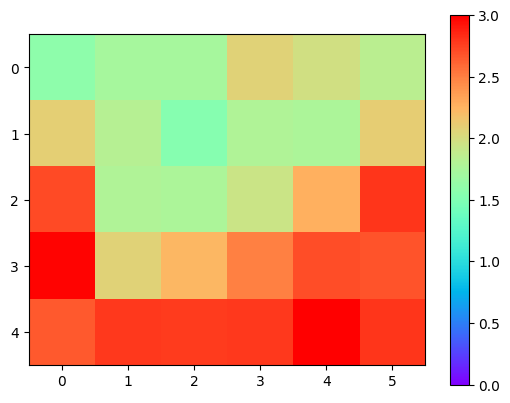

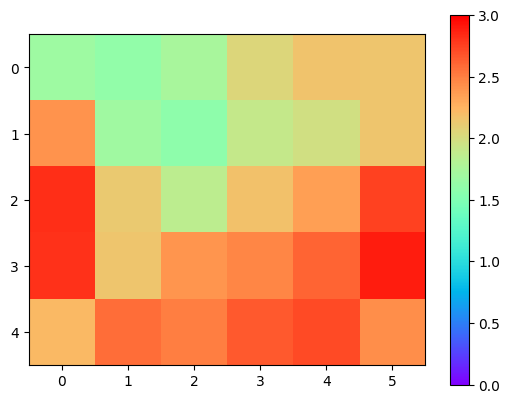

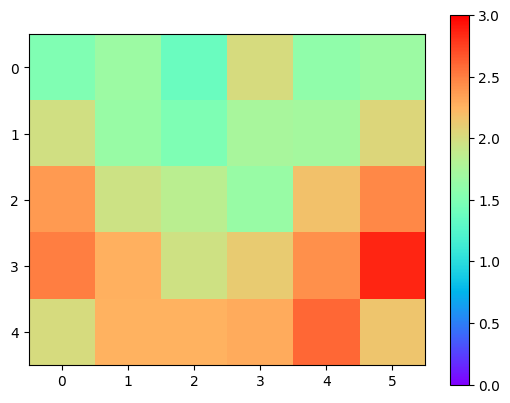

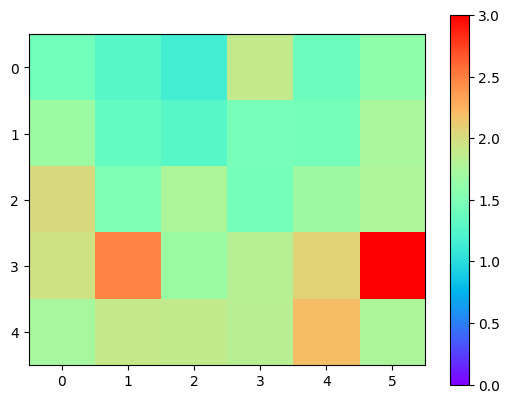

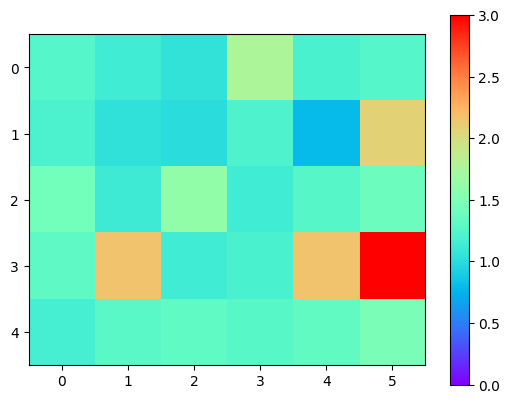

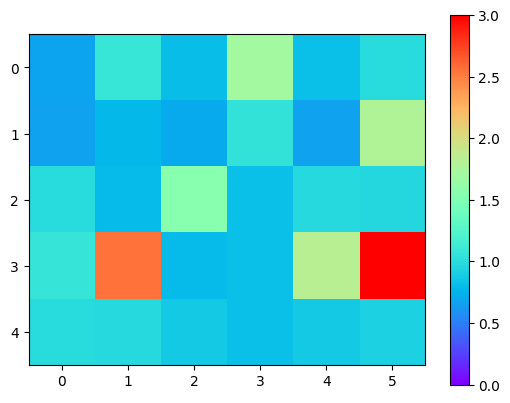

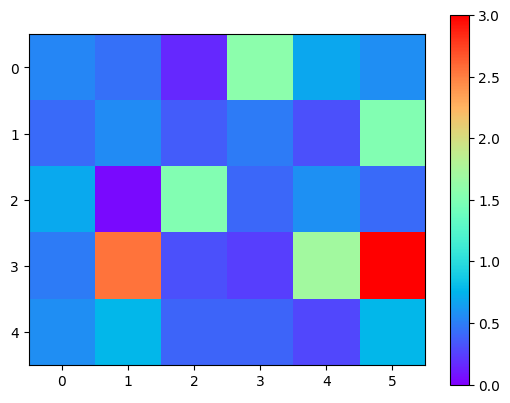

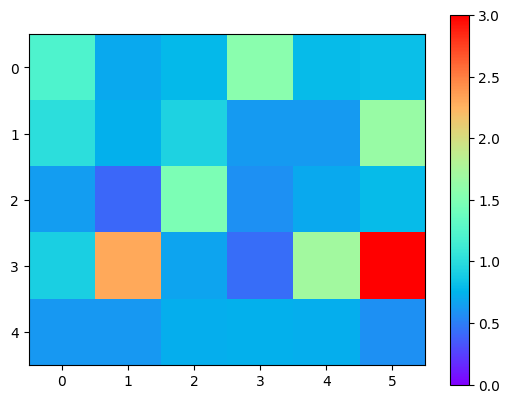

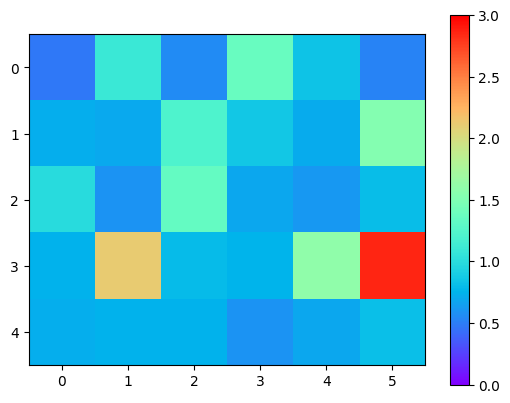

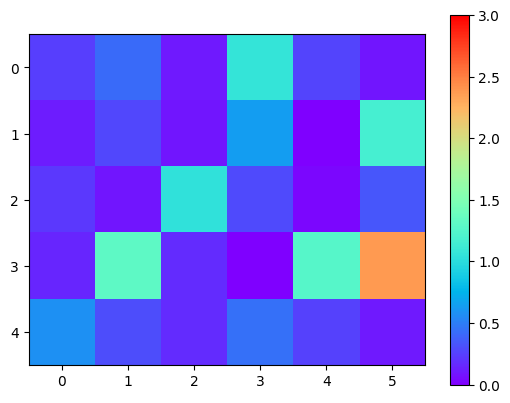

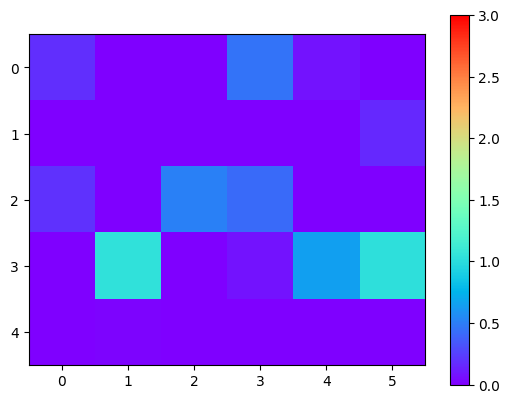

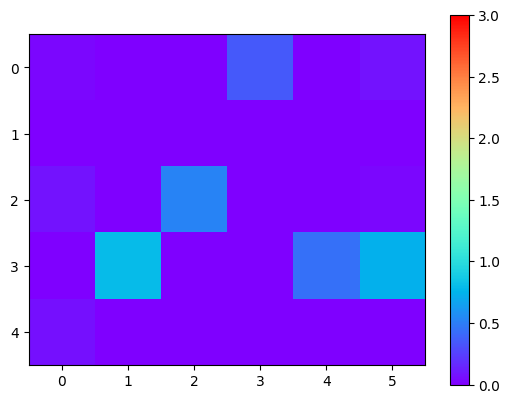

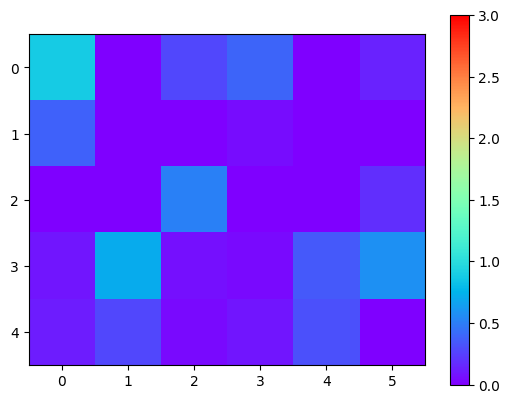

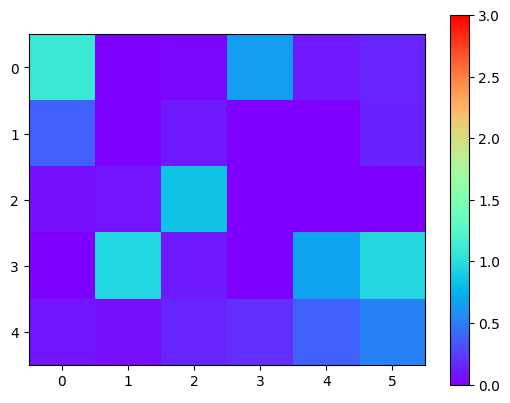

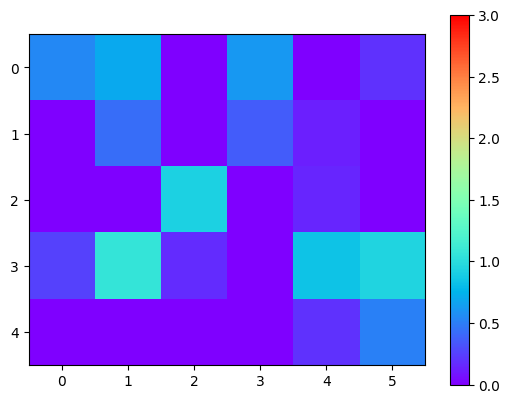

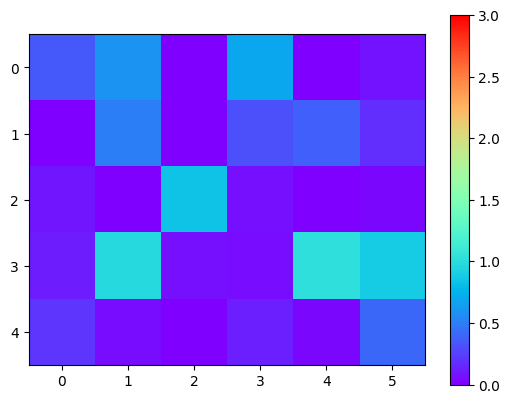

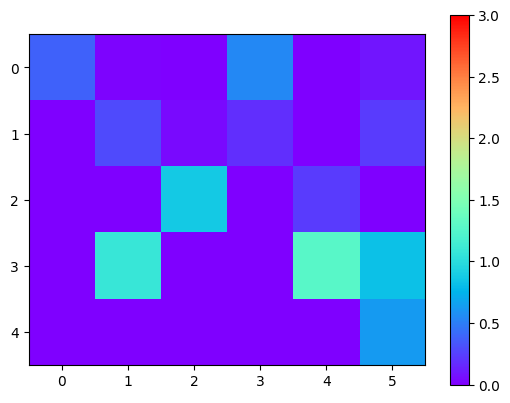

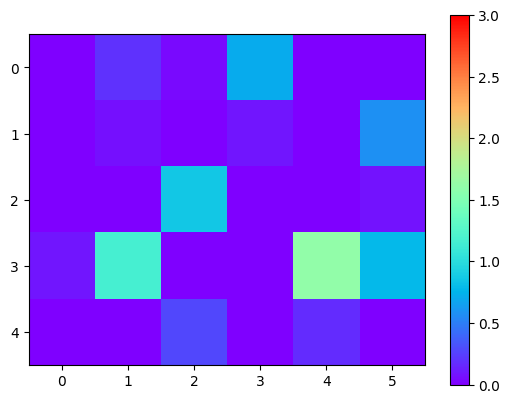

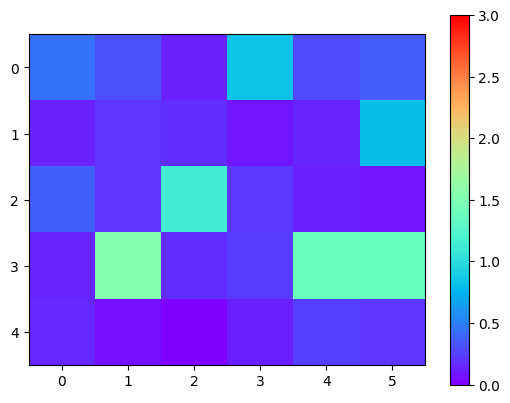

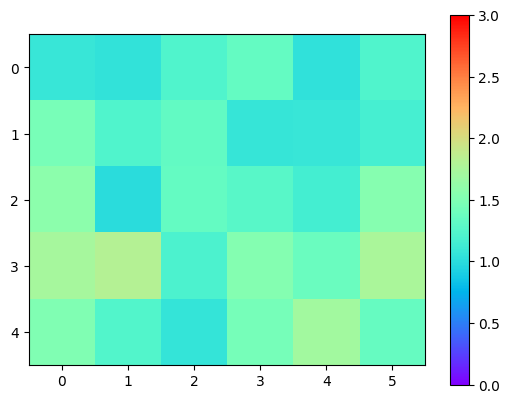

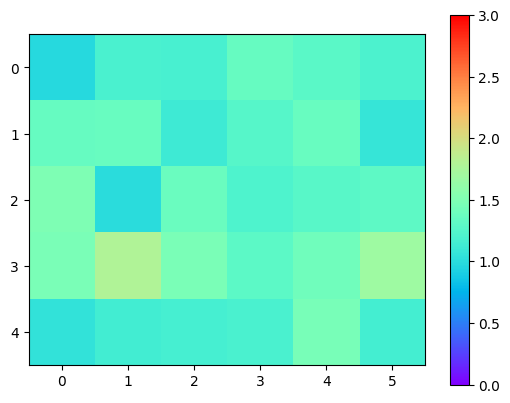

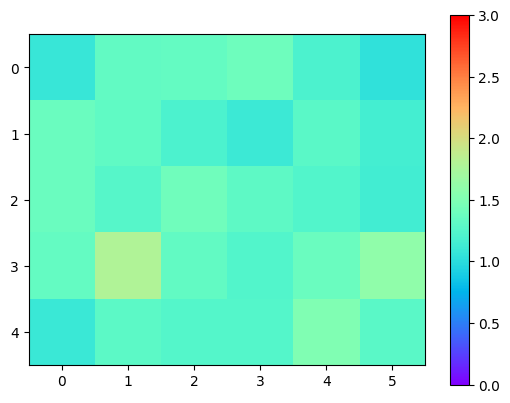

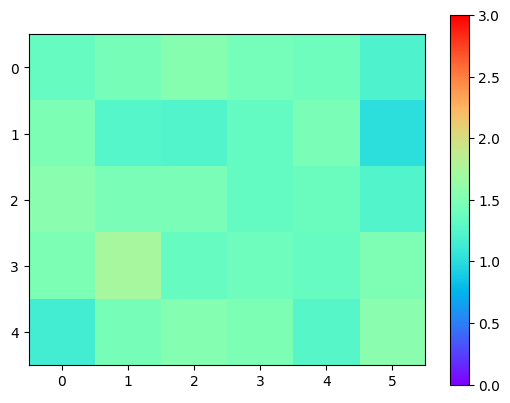

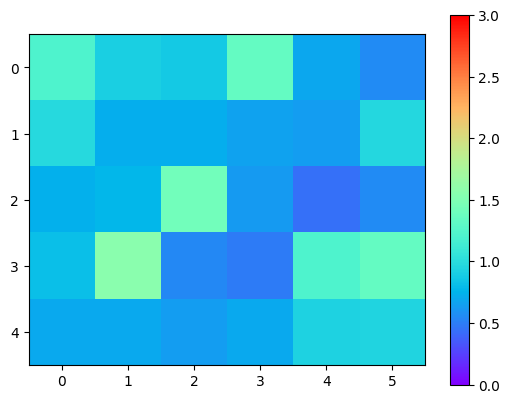

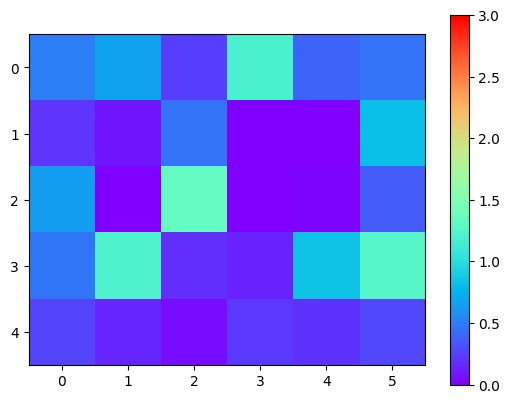

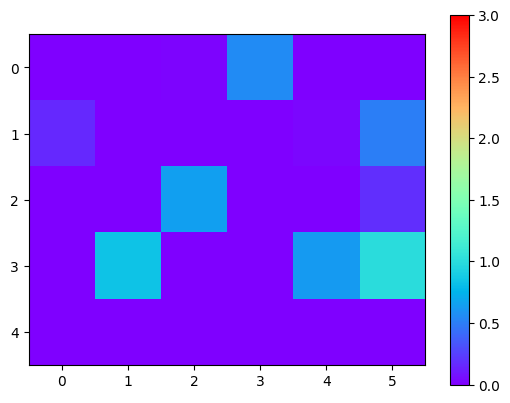

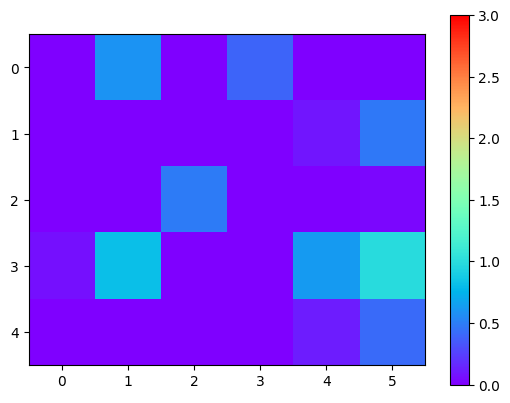

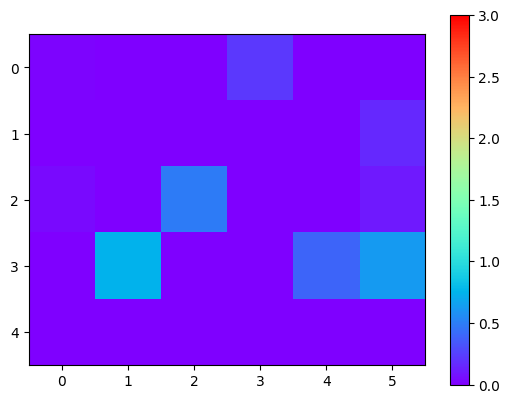

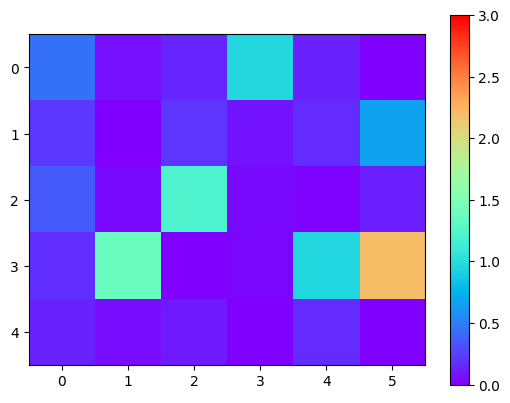

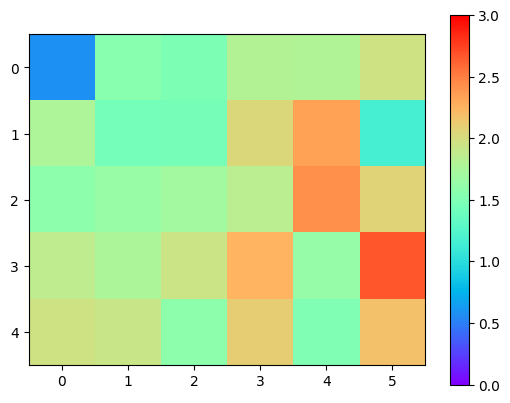

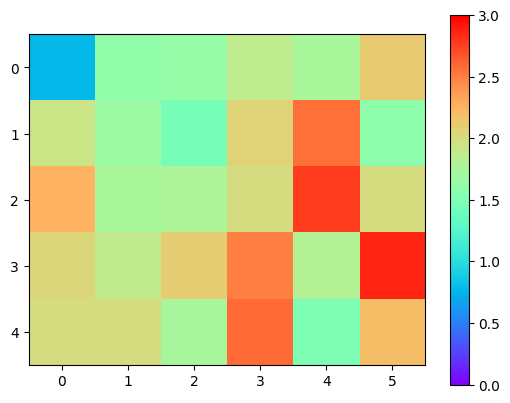

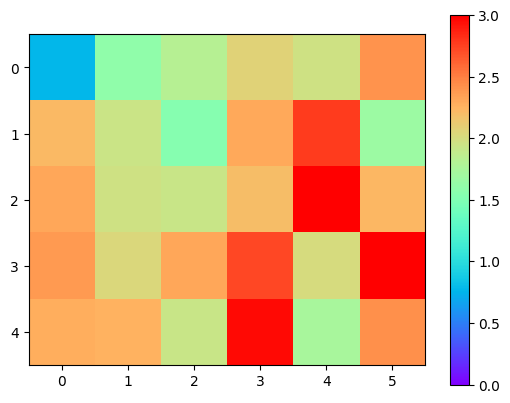

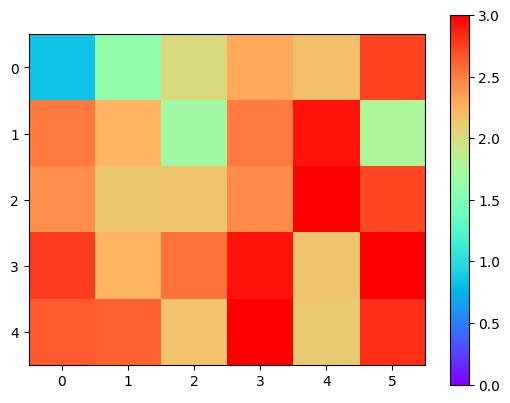

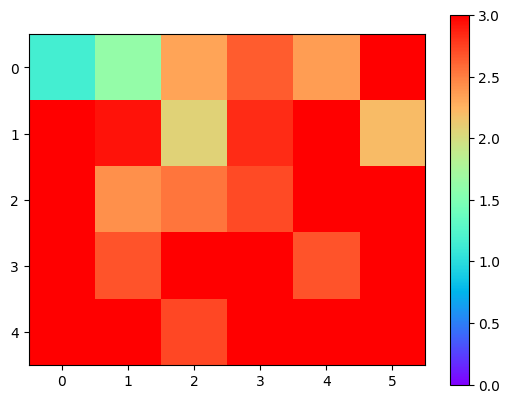

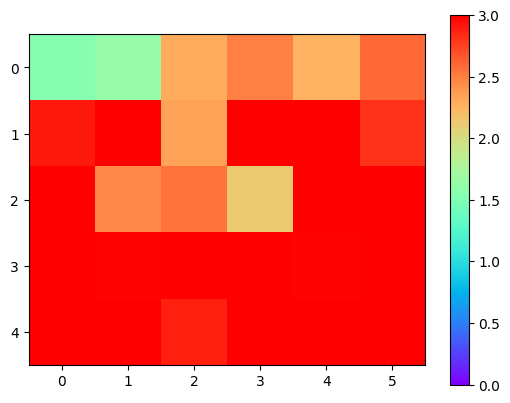

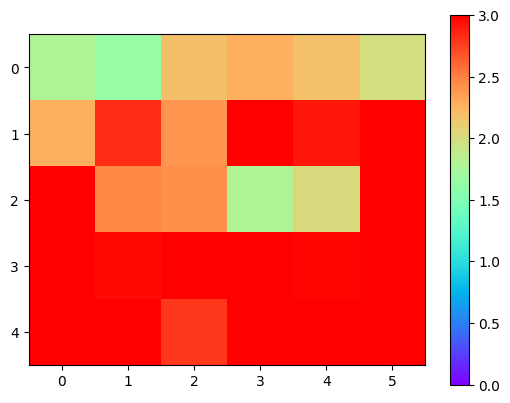

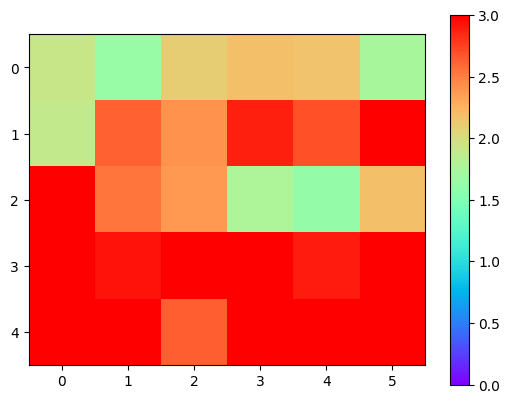

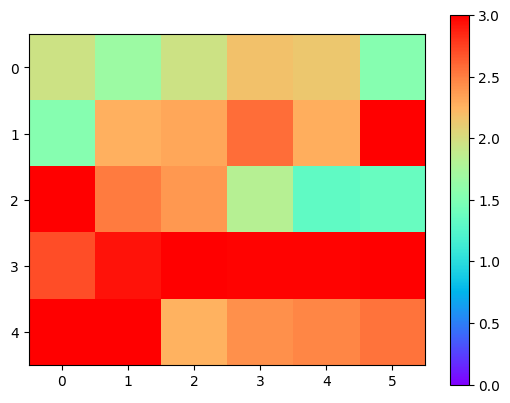

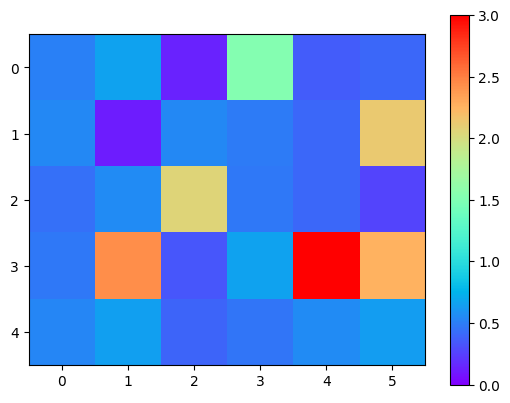

In [97]:
for n in range(S2_VWC_recovered_array_image.shape[2]):
    rgb_img_test = S2_VWC_recovered_array_image[:,:,n]
    plt.imshow(rgb_img_test,cmap='rainbow', interpolation='nearest',vmin=0, vmax=3)
    plt.colorbar()
    plt.show()